# Telecom X - Análisis de Evasión de Clientes
---

Como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

# **📌 Extracción(E - Extract)**

---



# **Extracción de datos**



Para iniciar el análisis, necesitamos  importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.


[Enlace de la API:](https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json)


¿Lo que Haremos?

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [ ]:
# =============================================================================
# ANÁLISIS DE DATOS TELECOM X - CARGA DESDE API
# Importación de datos desde GitHub API
# =============================================================================

# 1. IMPORTACIÓN DE LIBRERÍAS NECESARIAS
import pandas as pd
import requests
import json
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print(" INICIANDO ANÁLISIS DE DATOS TELECOM X")
print("="*50)

# 2. CONFIGURACIÓN DE LA URL DE LA API
# URL del archivo JSON en el repositorio de GitHub
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

print(f" URL de la API: {api_url}")
print(" Iniciando carga de datos...")

# 3. FUNCIÓN PARA CARGAR DATOS DESDE LA API
def cargar_datos_telecom(url):
    """
    Función para cargar datos desde la API de TelecomX
    Maneja estructuras JSON complejas y las normaliza

    Args:
        url (str): URL de la API

    Returns:
        pandas.DataFrame: DataFrame con los datos cargados y normalizados
    """
    try:

        print(" Realizando petición a la API...")
        response = requests.get(url)
        if response.status_code == 200:
            print(" Petición exitosa!")
            data = response.json()
            print(f" Tipo de datos recibidos: {type(data)}")
            if isinstance(data, list):
                print(" Los datos son una lista de registros")
                df = pd.json_normalize(data)
            elif isinstance(data, dict):
                print(" Los datos son un diccionario, normalizando...")
                df = pd.json_normalize(data)
            else:
                print(" Estructura de datos no reconocida, intentando conversión directa...")
                df = pd.DataFrame(data)
            print(f" Datos cargados exitosamente!")
            print(f" Dimensiones del dataset: {df.shape}")
            return df
        else:
            print(f" Error en la petición: Código {response.status_code}")
            return None
    except Exception as e:
        print(f" Error al cargar los datos: {str(e)}")
        print(" Intentando método alternativo...")
        try:
            response = requests.get(url)
            if response.status_code == 200:

                text_data = response.text
                json_data = json.loads(text_data)

                df = pd.json_normalize(json_data)
                print(f" Datos cargados con método alternativo!")
                print(f" Dimensiones del dataset: {df.shape}")
                return df
            else:
                return None
        except Exception as e2:
            print(f" Error también en método alternativo: {str(e2)}")
            return None

# 4. CARGAR LOS DATOS
df_telecom = cargar_datos_telecom(api_url)

# 5. VERIFICACIÓN INICIAL DE LOS DATOS
if df_telecom is not None:
    print("\n" + "="*50)
    print(" INFORMACIÓN GENERAL DEL DATASET")
    print("="*50)

    # Información básica
    print(f" Número de filas: {df_telecom.shape[0]:,}")
    print(f" Número de columnas: {df_telecom.shape[1]}")

    print(f"\n PRIMERAS 5 FILAS DEL DATASET:")
    print("-" * 50)
    display(df_telecom.head())

    print(f"\n NOMBRES DE LAS COLUMNAS:")
    print("-" * 50)
    for i, col in enumerate(df_telecom.columns, 1):
        print(f"{i:2d}. {col}")

    print(f"\n INFORMACIÓN DE TIPOS DE DATOS:")
    print("-" * 50)
    print(df_telecom.info())

    print(f"\n ESTADÍSTICAS DESCRIPTIVAS (COLUMNAS NUMÉRICAS):")
    print("-" * 50)
    display(df_telecom.describe())

    print(f"\n VALORES FALTANTES POR COLUMNA:")
    print("-" * 50)
    valores_faltantes = df_telecom.isnull().sum()
    if valores_faltantes.sum() > 0:
        print(valores_faltantes[valores_faltantes > 0])
    else:
        print(" No hay valores faltantes en el dataset")

    print(f"\n ¡DATOS CARGADOS Y VERIFICADOS CORRECTAMENTE!")
    print(" El DataFrame 'df_telecom' está listo para el análisis")

else:
    print(" No se pudieron cargar los datos. Revisa la conexión y la URL.")

# 6. FUNCIÓN ADICIONAL PARA EXPLORACIÓN RÁPIDA
def exploracion_rapida(df):
    """
    Función para realizar una exploración rápida del dataset
    Versión segura que maneja estructuras complejas

    Args:
        df (pandas.DataFrame): DataFrame a explorar
    """
    print("\n" + "="*60)
    print(" EXPLORACIÓN RÁPIDA DEL DATASET")
    print("="*60)


    print(f" Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")


    print(f"\n Distribución de tipos de datos:")
    tipos = df.dtypes.value_counts()
    for tipo, cantidad in tipos.items():
        print(f"   {tipo}: {cantidad} columnas")

    # Columnas categóricas
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    if cat_cols:
        print(f"\n Columnas categóricas ({len(cat_cols)}):")
        for col in cat_cols:
            try:
                # Verificar si la columna contiene valores hashables
                sample_val = df[col].iloc[0] if len(df) > 0 else None
                if isinstance(sample_val, (dict, list)):
                    print(f"   {col}: Contiene estructuras complejas (dict/list)")
                else:
                    unique_vals = df[col].nunique()
                    print(f"   {col}: {unique_vals} valores únicos")
            except:
                print(f"   {col}: No se puede calcular valores únicos (estructura compleja)")

    # Columnas numéricas
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if num_cols:
        print(f"\n Columnas numéricas ({len(num_cols)}):")
        for col in num_cols:
            try:
                print(f"   {col}: rango [{df[col].min():.2f}, {df[col].max():.2f}]")
            except:
                print(f"   {col}: No se puede calcular rango")

 INICIANDO ANÁLISIS DE DATOS TELECOM X
 URL de la API: https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json
 Iniciando carga de datos...
 Realizando petición a la API...
 Petición exitosa!
 Tipo de datos recibidos: <class 'list'>
 Los datos son una lista de registros
 Datos cargados exitosamente!
 Dimensiones del dataset: (7267, 21)

 INFORMACIÓN GENERAL DEL DATASET
 Número de filas: 7,267
 Número de columnas: 21

 PRIMERAS 5 FILAS DEL DATASET:
--------------------------------------------------


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



 NOMBRES DE LAS COLUMNAS:
--------------------------------------------------
 1. customerID
 2. Churn
 3. customer.gender
 4. customer.SeniorCitizen
 5. customer.Partner
 6. customer.Dependents
 7. customer.tenure
 8. phone.PhoneService
 9. phone.MultipleLines
10. internet.InternetService
11. internet.OnlineSecurity
12. internet.OnlineBackup
13. internet.DeviceProtection
14. internet.TechSupport
15. internet.StreamingTV
16. internet.StreamingMovies
17. account.Contract
18. account.PaperlessBilling
19. account.PaymentMethod
20. account.Charges.Monthly
21. account.Charges.Total

 INFORMACIÓN DE TIPOS DE DATOS:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000



 VALORES FALTANTES POR COLUMNA:
--------------------------------------------------
 No hay valores faltantes en el dataset

 ¡DATOS CARGADOS Y VERIFICADOS CORRECTAMENTE!
 El DataFrame 'df_telecom' está listo para el análisis


# Breve Interpretaciòn lo que se realizo

Se cargaron los datos de la API de Telecom X (formato JSON) desde GitHub usando Python, convirtiéndolos en un DataFrame de Pandas con la función cargar_datos_telecom. Esta normaliza estructuras anidadas y maneja errores con un método alternativo. Se verificaron dimensiones, tipos de datos, estadísticas y valores faltantes, explorando columnas categóricas y numéricas con exploracion_rapida y detallando su estructura con examinar_estructura_datos. El DataFrame df_telecom está listo para el Análisis Exploratorio de Datos (EDA).

# **🔧 Transformación (T - Transform)**

---



# **Conoce el conjunto de datos**



Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.


📌 Tips:

🔗 [Documentación de](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) DataFrame.info()

🔗 [Documentación de](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)DataFrame.dtypes

In [ ]:
# =============================================================================
# ANÁLISIS EXPLORATORIO Y TRANSFORMACIÓN DE DATOS - TELECOM X
# Exploración detallada y preparación para análisis de evasión
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print(" ANÁLISIS EXPLORATORIO DE DATOS - TELECOM X")
print("="*60)


#  INFORMACIÓN GENERAL DEL DATASET

def analisis_general_dataset(df):
    """
    Proporciona un análisis general completo del dataset
    """
    print("\n  ANÁLISIS GENERAL DEL DATASET")
    print("="*50)

    # Información básica
    print(f" Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")


def explorar_columnas_detallado(df):
    """
    Explora cada columna en detalle, identificando patrones importantes
    """
    print(f"\n  EXPLORACIÓN DETALLADA DE COLUMNAS")
    print("="*50)

    columnas_info = {}

    for col in df.columns:
        print(f"\n COLUMNA: {col}")
        print("-" * 30)

        col_info = {
            'tipo': str(df[col].dtype),
            'valores_nulos': df[col].isnull().sum(),
            'porcentaje_nulos': (df[col].isnull().sum() / len(df)) * 100,
            'valores_unicos': None,
            'ejemplos': []
        }

        # Información básica
        print(f"   Tipo: {df[col].dtype}")
        print(f"   Valores nulos: {col_info['valores_nulos']} ({col_info['porcentaje_nulos']:.2f}%)")

        if df[col].dtype == 'object':
            # Para columnas de tipo objeto
            sample_val = df[col].dropna().iloc[0] if len(df[col].dropna()) > 0 else None

            if isinstance(sample_val, (dict, list)):
                print(f"     Contiene estructuras complejas: {type(sample_val).__name__}")
                col_info['tipo_complejo'] = type(sample_val).__name__

                # Mostrar ejemplos de la estructura
                ejemplos = df[col].dropna().head(3).tolist()
                for i, ejemplo in enumerate(ejemplos):
                    if isinstance(ejemplo, dict):
                        keys = list(ejemplo.keys()) if ejemplo else []
                        print(f"   Ejemplo {i+1}: dict con llaves: {keys}")
                        col_info['ejemplos'].append(f"dict_keys: {keys}")
                    elif isinstance(ejemplo, list):
                        print(f"   Ejemplo {i+1}: list con {len(ejemplo)} elementos")
                        col_info['ejemplos'].append(f"list_length: {len(ejemplo)}")
            else:
                # Columnas de texto normales
                try:
                    unique_count = df[col].nunique()
                    col_info['valores_unicos'] = unique_count
                    print(f"   Valores únicos: {unique_count}")

                    if unique_count <= 20:
                        print(f"   Valores: {df[col].unique().tolist()}")
                    else:
                        top_values = df[col].value_counts().head(5)
                        print(f"   Top 5 valores más frecuentes:")
                        for valor, count in top_values.items():
                            print(f"     '{valor}': {count} veces")

                except Exception as e:
                    print(f"     Error al analizar valores únicos: {str(e)}")

        else:
            # Para columnas numéricas
            col_info['valores_unicos'] = df[col].nunique()
            print(f"   Valores únicos: {col_info['valores_unicos']}")
            print(f"   Rango: [{df[col].min():.2f}, {df[col].max():.2f}]")
            print(f"   Media: {df[col].mean():.2f}")
            print(f"   Mediana: {df[col].median():.2f}")

        columnas_info[col] = col_info

    return columnas_info

#  IDENTIFICACIÓN DE VARIABLES RELEVANTES PARA EVASIÓN

def identificar_variables_evasion(df, columnas_info):
    """
    Identifica las variables más relevantes para el análisis de evasión
    """
    print(f"\n  IDENTIFICACIÓN DE VARIABLES PARA ANÁLISIS DE EVASIÓN")
    print("="*60)

    # Buscar columnas relacionadas con evasión/churn
    posibles_target = []
    variables_demograficas = []
    variables_servicios = []
    variables_financieras = []
    variables_comportamiento = []

    for col in df.columns:
        col_lower = col.lower()

        # Variable objetivo (evasión/churn)
        if any(keyword in col_lower for keyword in ['churn', 'evasi', 'abandon', 'cancel', 'target']):
            posibles_target.append(col)

        # Variables demográficas
        elif any(keyword in col_lower for keyword in ['age', 'edad', 'gender', 'genero', 'sexo', 'senior', 'partner', 'pareja']):
            variables_demograficas.append(col)

        # Variables de servicios
        elif any(keyword in col_lower for keyword in ['service', 'servicio', 'phone', 'telefono', 'internet', 'tv', 'streaming']):
            variables_servicios.append(col)

        # Variables financieras
        elif any(keyword in col_lower for keyword in ['charge', 'cargo', 'total', 'monthly', 'mensual', 'payment', 'pago', 'contract', 'contrato']):
            variables_financieras.append(col)

        # Variables de comportamiento
        elif any(keyword in col_lower for keyword in ['tenure', 'permanencia', 'customer', 'cliente', 'support', 'soporte']):
            variables_comportamiento.append(col)

    print(f" POSIBLES VARIABLES OBJETIVO (EVASIÓN):")
    for var in posibles_target:
        print(f"   ✓ {var}")

    print(f"\n VARIABLES DEMOGRÁFICAS ({len(variables_demograficas)}):")
    for var in variables_demograficas:
        print(f"   • {var}")

    print(f"\n VARIABLES DE SERVICIOS ({len(variables_servicios)}):")
    for var in variables_servicios:
        print(f"   • {var}")

    print(f"\n VARIABLES FINANCIERAS ({len(variables_financieras)}):")
    for var in variables_financieras:
        print(f"   • {var}")

    print(f"\n VARIABLES DE COMPORTAMIENTO ({len(variables_comportamiento)}):")
    for var in variables_comportamiento:
        print(f"   • {var}")

    # Crear resumen de variables relevantes
    variables_relevantes = {
        'target': posibles_target,
        'demograficas': variables_demograficas,
        'servicios': variables_servicios,
        'financieras': variables_financieras,
        'comportamiento': variables_comportamiento
    }

    return variables_relevantes

#  ANÁLISIS DE CALIDAD DE DATOS

def analisis_calidad_datos(df):
    """
    Analiza la calidad de los datos y sugiere transformaciones
    """
    print(f"\n  ANÁLISIS DE CALIDAD DE DATOS")
    print("="*50)

    # Valores faltantes
    valores_faltantes = df.isnull().sum()
    if valores_faltantes.sum() > 0:
        print(f"\n VALORES FALTANTES DETECTADOS:")
        for col, missing in valores_faltantes[valores_faltantes > 0].items():
            porcentaje = (missing / len(df)) * 100
            print(f"   {col}: {missing} valores ({porcentaje:.2f}%)")
    else:
        print(f"\n No hay valores faltantes en el dataset")

    # Duplicados
    duplicados = df.duplicated().sum()
    print(f"\n REGISTROS DUPLICADOS: {duplicados}")

    # Análisis de cardinalidad
    print(f"\n ANÁLISIS DE CARDINALIDAD:")
    print("-" * 30)
    for col in df.columns:
        if df[col].dtype != 'object' or not isinstance(df[col].iloc[0], (dict, list)):
            try:
                unique_count = df[col].nunique()
                total_count = len(df)
                cardinalidad = unique_count / total_count

                if cardinalidad == 1.0:
                    categoria = " Identificador único"
                elif cardinalidad > 0.95:
                    categoria = " Alta cardinalidad"
                elif cardinalidad < 0.01:
                    categoria = " Muy baja cardinalidad"
                elif cardinalidad < 0.1:
                    categoria = " Baja cardinalidad"
                else:
                    categoria = " Cardinalidad media"

                print(f"   {col}: {unique_count}/{total_count} ({cardinalidad:.3f}) - {categoria}")
            except:
                print(f"   {col}: No se puede calcular (estructura compleja)")

#  PREPARACIÓN PARA TRANSFORMACIONES

def sugerir_transformaciones(df, variables_relevantes):
    """
    Sugiere transformaciones necesarias para el análisis
    """
    print(f"\n  SUGERENCIAS DE TRANSFORMACIÓN")
    print("="*50)

    transformaciones = []

    for col in df.columns:
        col_tipo = df[col].dtype
        sample_val = df[col].dropna().iloc[0] if len(df[col].dropna()) > 0 else None

        if col_tipo == 'object' and isinstance(sample_val, (dict, list)):
            transformaciones.append(f" {col}: Expandir estructura compleja")

        elif col_tipo == 'object' and not isinstance(sample_val, (dict, list)):
            # Revisar si puede ser categórica o necesita encoding
            unique_count = df[col].nunique()
            if unique_count <= 10:
                transformaciones.append(f" {col}: Convertir a categórica")
            elif unique_count <= 50:
                transformaciones.append(f" {col}: Considerar encoding (One-Hot/Label)")

        elif col_tipo in ['int64', 'float64']:
            # Revisar si es realmente numérica o categórica
            unique_count = df[col].nunique()
            if unique_count <= 10 and df[col].min() >= 0:
                transformaciones.append(f" {col}: Posiblemente categórica (revisar)")

    print(" TRANSFORMACIONES RECOMENDADAS:")
    for transformacion in transformaciones:
        print(f"   {transformacion}")

    return transformaciones


# EJECUTAR ANÁLISIS COMPLETO

if 'df_telecom' in globals():
    print(" Iniciando análisis exploratorio completo...")

    #  Análisis general
    tipos_datos = analisis_general_dataset(df_telecom)

    #  Exploración detallada de columnas
    info_columnas = explorar_columnas_detallado(df_telecom)

    #  Identificar variables para evasión
    variables_relevantes = identificar_variables_evasion(df_telecom, info_columnas)

    #  Análisis de calidad
    analisis_calidad_datos(df_telecom)

    #  Sugerencias de transformación
    transformaciones = sugerir_transformaciones(df_telecom, variables_relevantes)

    print("\n" + "="*60)
    print(" ANÁLISIS EXPLORATORIO COMPLETADO")
    print(" Variables identificadas para análisis de evasión")
    print(" Transformaciones sugeridas para el siguiente paso")
    print("="*60)

else:
    print(" No se encontró df_telecom. Ejecuta primero el código de carga de datos.")

#  CREAR DICCIONARIO DE DATOS BÁSICO


def crear_diccionario_datos_basico(df, variables_relevantes):
    """
    Crea un diccionario de datos básico basado en el análisis
    """
    print(f"\n DICCIONARIO DE DATOS BÁSICO")
    print("="*50)

    diccionario = {}

    for col in df.columns:
        tipo = str(df[col].dtype)
        valores_nulos = df[col].isnull().sum()

        # Determinar categoría
        categoria = "Otra"
        for cat, vars_list in variables_relevantes.items():
            if col in vars_list:
                categoria = cat.title()
                break


        if valores_nulos > 0:
            descripcion = f"Columna de tipo {tipo} con {valores_nulos} valores faltantes. Categoría: {categoria}"
        else:
            descripcion = f"Columna de tipo {tipo} sin valores faltantes. Categoría: {categoria}"

        diccionario[col] = descripcion
        print(f" {col}: {descripcion}")

    return diccionario

# Ejecutar creación de diccionario si los datos están disponibles
if 'df_telecom' in globals() and 'variables_relevantes' in globals():
    diccionario_datos = crear_diccionario_datos_basico(df_telecom, variables_relevantes)

 ANÁLISIS EXPLORATORIO DE DATOS - TELECOM X
 Iniciando análisis exploratorio completo...

  ANÁLISIS GENERAL DEL DATASET
 Dimensiones: 7,267 filas × 21 columnas

  EXPLORACIÓN DETALLADA DE COLUMNAS

 COLUMNA: customerID
------------------------------
   Tipo: object
   Valores nulos: 0 (0.00%)
   Valores únicos: 7267
   Top 5 valores más frecuentes:
     '9995-HOTOH': 1 veces
     '0002-ORFBO': 1 veces
     '0003-MKNFE': 1 veces
     '9970-QBCDA': 1 veces
     '9968-FFVVH': 1 veces

 COLUMNA: Churn
------------------------------
   Tipo: object
   Valores nulos: 0 (0.00%)
   Valores únicos: 3
   Valores: ['No', 'Yes', '']

 COLUMNA: customer.gender
------------------------------
   Tipo: object
   Valores nulos: 0 (0.00%)
   Valores únicos: 2
   Valores: ['Female', 'Male']

 COLUMNA: customer.SeniorCitizen
------------------------------
   Tipo: int64
   Valores nulos: 0 (0.00%)
   Valores únicos: 2
   Rango: [0.00, 1.00]
   Media: 0.16
   Mediana: 0.00

 COLUMNA: customer.Partner
----

# Breve Interpretaciòn lo que se realizo
Se realizó un análisis exploratorio del dataset de Telecom X (df_telecom) para comprender su estructura y preparar los datos para el análisis de evasión de clientes. La función analisis_general_dataset mostró dimensiones y estructura general. Con explorar_columnas_detallado, se examinaron tipos de datos, valores nulos, únicos y estadísticas por columna, identificando estructuras complejas. La función identificar_variables_evasion clasificó columnas relevantes en objetivo (evasión), demográficas, servicios, financieras y comportamiento. analisis_calidad_datos evaluó valores faltantes, duplicados y cardinalidad, mientras que sugerir_transformaciones recomendó conversiones para estructuras complejas, categóricas y numéricas. Finalmente, crear_diccionario_datos_basico generó un diccionario de datos con descripciones y categorías. El dataset está preparado para transformaciones y análisis de evasión.

# **Comprobación de incoherencias en los datos**
En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

📌 Tips:

🔗 [Documentación de](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) pandas.unique()

🔗 [Documentación de](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.normalize.html) pandas.Series.dt.normalize()

In [ ]:
# =============================================================================
# LIMPIEZA Y VERIFICACIÓN DE CALIDAD DE DATOS - TELECOM X
# Detección y corrección de problemas de calidad
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import warnings
warnings.filterwarnings('ignore')

print(" LIMPIEZA Y VERIFICACIÓN DE CALIDAD - TELECOM X")
print("="*60)


# DETECCIÓN DE VALORES AUSENTES


def analizar_valores_ausentes(df):
    """
    Analiza valores ausentes en el dataset con diferentes criterios
    """
    print("\n  ANÁLISIS DE VALORES AUSENTES")
    print("="*50)

    # Valores nulos tradicionales
    valores_nulos = df.isnull().sum()

    valores_ausentes_extendidos = {}

    for col in df.columns:
        ausentes_count = 0
        tipos_ausentes = []

        nulos_std = df[col].isnull().sum()
        if nulos_std > 0:
            ausentes_count += nulos_std
            tipos_ausentes.append(f"NULL: {nulos_std}")

        # Solo para columnas de texto
        if df[col].dtype == 'object':
            # Verificar si no contiene estructuras complejas
            sample_val = df[col].dropna().iloc[0] if len(df[col].dropna()) > 0 else None
            if not isinstance(sample_val, (dict, list)):
                # Cadenas vacías
                vacias = (df[col] == '').sum()
                if vacias > 0:
                    ausentes_count += vacias
                    tipos_ausentes.append(f"Vacías: {vacias}")

                # Espacios en blanco
                espacios = df[col].str.strip().eq('').sum()
                if espacios > vacias:  # Solo contar adicionales
                    extra_espacios = espacios - vacias
                    ausentes_count += extra_espacios
                    tipos_ausentes.append(f"Solo espacios: {extra_espacios}")

                # Valores como 'N/A', 'null', 'none', etc.
                patrones_ausentes = ['n/a', 'na', 'null', 'none', 'missing', 'unknown', '-', '--']
                for patron in patrones_ausentes:
                    count_patron = df[col].str.lower().eq(patron).sum()
                    if count_patron > 0:
                        ausentes_count += count_patron
                        tipos_ausentes.append(f"'{patron.upper()}': {count_patron}")

        if ausentes_count > 0:
            valores_ausentes_extendidos[col] = {
                'total': ausentes_count,
                'porcentaje': (ausentes_count / len(df)) * 100,
                'tipos': tipos_ausentes
            }

    # Mostrar resultados
    if valores_ausentes_extendidos:
        print(" VALORES AUSENTES DETECTADOS:")
        for col, info in valores_ausentes_extendidos.items():
            print(f"\n {col}:")
            print(f"   Total ausentes: {info['total']} ({info['porcentaje']:.2f}%)")
            for tipo in info['tipos']:
                print(f"   - {tipo}")
    else:
        print(" No se detectaron valores ausentes")

    return valores_ausentes_extendidos

#  DETECCIÓN DE DUPLICADOS

def analizar_duplicados(df):
    """
    Analiza diferentes tipos de duplicados en el dataset
    """
    print(f"\n  ANÁLISIS DE DUPLICADOS")
    print("="*50)

    # Duplicados completos
    duplicados_completos = df.duplicated().sum()
    print(f" Filas completamente duplicadas: {duplicados_completos}")

    if duplicados_completos > 0:
        print("   Ubicaciones de duplicados:")
        indices_duplicados = df[df.duplicated()].index.tolist()
        print(f"   Índices: {indices_duplicados[:10]}{'...' if len(indices_duplicados) > 10 else ''}")


    posibles_ids = []
    for col in df.columns:
        if df[col].dtype != 'object' or not isinstance(df[col].iloc[0] if len(df) > 0 else None, (dict, list)):
            try:
                unique_ratio = df[col].nunique() / len(df)
                if unique_ratio > 0.95:  # Alta cardinalidad, posible ID
                    posibles_ids.append(col)
            except:
                pass

    print(f"\n Posibles columnas identificadoras: {posibles_ids}")

    # Analizar duplicados en columnas clave
    for col in posibles_ids[:3]:  # Analizar máximo 3 columnas
        try:
            duplicados_col = df[col].duplicated().sum()
            if duplicados_col > 0:
                print(f"  Duplicados en {col}: {duplicados_col}")
                valores_duplicados = df[df[col].duplicated()][col].tolist()
                print(f"   Valores duplicados: {valores_duplicados[:5]}{'...' if len(valores_duplicados) > 5 else ''}")
        except:
            pass

    return {
        'completos': duplicados_completos,
        'posibles_ids': posibles_ids,
        'indices_duplicados': df[df.duplicated()].index.tolist() if duplicados_completos > 0 else []
    }


#  VERIFICACIÓN DE ERRORES DE FORMATO


def verificar_errores_formato(df):
    """
    Verifica errores de formato en diferentes tipos de columnas
    """
    print(f"\n VERIFICACIÓN DE ERRORES DE FORMATO")
    print("="*50)

    errores_formato = {}

    for col in df.columns:
        errores_col = []

        if df[col].dtype == 'object':
            sample_val = df[col].dropna().iloc[0] if len(df[col].dropna()) > 0 else None

            # Solo analizar si no son estructuras complejas
            if not isinstance(sample_val, (dict, list)):
                valores_unicos = df[col].dropna().unique()

                # Detectar posibles fechas mal formateadas
                if any(re.search(r'\d{1,2}[/-]\d{1,2}[/-]\d{2,4}', str(val)) for val in valores_unicos[:10]):
                    formatos_fecha = set()
                    for val in valores_unicos:
                        if pd.notna(val) and re.search(r'\d{1,2}[/-]\d{1,2}[/-]\d{2,4}', str(val)):
                            formatos_fecha.add(len(str(val).split('/')))

                    if len(formatos_fecha) > 1:
                        errores_col.append("Formatos de fecha inconsistentes")

                # Detectar números como texto
                valores_numericos = 0
                valores_texto = 0
                for val in valores_unicos[:20]:  # Muestra de 20 valores
                    if pd.notna(val):
                        str_val = str(val).strip()
                        if re.match(r'^-?\d+\.?\d*$', str_val):
                            valores_numericos += 1
                        elif not str_val.isdigit():
                            valores_texto += 1

                if valores_numericos > 0 and valores_texto > 0:
                    errores_col.append("Mezcla de números y texto")

                # Detectar inconsistencias en capitalización
                if len(valores_unicos) > 1:
                    valores_alpha = [str(val) for val in valores_unicos if pd.notna(val) and str(val).isalpha()]
                    if len(valores_alpha) > 1:
                        casos_diferentes = set()
                        for val in valores_alpha[:10]:
                            if val.islower():
                                casos_diferentes.add('lower')
                            elif val.isupper():
                                casos_diferentes.add('upper')
                            elif val.istitle():
                                casos_diferentes.add('title')
                            else:
                                casos_diferentes.add('mixed')

                        if len(casos_diferentes) > 1:
                            errores_col.append(f"Inconsistencia en capitalización: {casos_diferentes}")

        elif df[col].dtype in ['int64', 'float64']:
            # Verificar valores extremos en columnas numéricas
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 3 * IQR
            limite_superior = Q3 + 3 * IQR

            outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)].shape[0]
            if outliers > 0:
                errores_col.append(f"Valores extremos detectados: {outliers} ({outliers/len(df)*100:.2f}%)")

        if errores_col:
            errores_formato[col] = errores_col

    # Mostrar resultados
    if errores_formato:
        print("  ERRORES DE FORMATO DETECTADOS:")
        for col, errores in errores_formato.items():
            print(f"\n {col}:")
            for error in errores:
                print(f"   - {error}")
    else:
        print(" No se detectaron errores de formato evidentes")

    return errores_formato


#  VERIFICACIÓN DE INCONSISTENCIAS EN CATEGORÍAS


def verificar_inconsistencias_categoricas(df):
    """
    Verifica inconsistencias en variables categóricas usando pandas.unique()
    """
    print(f"\n VERIFICACIÓN DE INCONSISTENCIAS CATEGÓRICAS")
    print("="*50)

    inconsistencias = {}

    for col in df.columns:
        if df[col].dtype == 'object':
            sample_val = df[col].dropna().iloc[0] if len(df[col].dropna()) > 0 else None

            # Solo analizar si no son estructuras complejas
            if not isinstance(sample_val, (dict, list)):
                try:
                    # Usar pandas.unique() como se sugiere
                    valores_unicos = pd.unique(df[col].dropna())

                    if len(valores_unicos) <= 50:
                        problemas_col = []

                        # Convertir a string para análisis
                        valores_str = [str(val).strip() for val in valores_unicos]

                        # Detectar valores similares
                        for i, val1 in enumerate(valores_str):
                            for j, val2 in enumerate(valores_str[i+1:], i+1):
                                if val1.lower() == val2.lower() and val1 != val2:
                                    problemas_col.append(f"Capitalización: '{val1}' vs '{val2}'")
                                elif len(val1) > 3 and len(val2) > 3:
                                    # Detectar similitudes
                                    if abs(len(val1) - len(val2)) <= 2:
                                        diferencias = sum(c1 != c2 for c1, c2 in zip(val1.lower(), val2.lower()))
                                        if diferencias <= 2 and diferencias > 0:
                                            problemas_col.append(f"Posible error tipográfico: '{val1}' vs '{val2}'")

                        # Detectar espacios extra
                        valores_con_espacios = [val for val in valores_str if val != val.strip()]
                        if valores_con_espacios:
                            problemas_col.append(f"Espacios extra en: {valores_con_espacios}")

                        # Detectar caracteres especiales inconsistentes
                        caracteres_especiales = set()
                        for val in valores_str:
                            especiales = re.findall(r'[^\w\s]', val)
                            caracteres_especiales.update(especiales)

                        if len(caracteres_especiales) > 3:  # Muchos caracteres especiales diferentes
                            problemas_col.append(f"Caracteres especiales variados: {list(caracteres_especiales)}")

                        if problemas_col:
                            inconsistencias[col] = {
                                'valores_unicos': len(valores_unicos),
                                'problemas': problemas_col,
                                'muestra_valores': valores_str[:10]
                            }

                        # Mostrar valores únicos de columnas categóricas pequeñas
                        if len(valores_unicos) <= 10:
                            print(f"\n {col} (valores únicos: {len(valores_unicos)}):")
                            for val in valores_unicos:
                                count = df[df[col] == val].shape[0]
                                print(f"   '{val}': {count} registros")

                except Exception as e:
                    print(f"  Error analizando {col}: {str(e)}")

    # Mostrar inconsistencias encontradas
    if inconsistencias:
        print(f"\n INCONSISTENCIAS CATEGÓRICAS DETECTADAS:")
        for col, info in inconsistencias.items():
            print(f"\n {col} ({info['valores_unicos']} valores únicos):")
            for problema in info['problemas']:
                print(f"   - {problema}")
    else:
        print(f"\n No se detectaron inconsistencias categóricas evidentes")

    return inconsistencias


#  VERIFICACIÓN DE FECHAS (SI APLICA)


def verificar_fechas(df):
    """
    Verifica problemas en columnas de fechas usando pandas.Series.dt.normalize()
    """
    print(f"\n  VERIFICACIÓN DE FECHAS")
    print("="*50)

    columnas_fecha = []
    problemas_fecha = {}

    for col in df.columns:
        # Buscar columnas que podrían contener fechas
        if 'date' in col.lower() or 'fecha' in col.lower() or df[col].dtype == 'datetime64[ns]':
            columnas_fecha.append(col)
        elif df[col].dtype == 'object':
            # Verificar si contiene patrones de fecha
            sample_vals = df[col].dropna().head(5).tolist()
            if any(re.search(r'\d{1,2}[/-]\d{1,2}[/-]\d{2,4}', str(val)) for val in sample_vals):
                columnas_fecha.append(col)

    if not columnas_fecha:
        print("  No se detectaron columnas de fecha")
        return {}

    for col in columnas_fecha:
        problemas_col = []

        try:
            # Intentar convertir a datetime
            if df[col].dtype != 'datetime64[ns]':
                fecha_convertida = pd.to_datetime(df[col], errors='coerce')
            else:
                fecha_convertida = df[col]

            # Contar valores que no se pudieron convertir
            valores_invalidos = fecha_convertida.isnull().sum() - df[col].isnull().sum()
            if valores_invalidos > 0:
                problemas_col.append(f"Fechas inválidas: {valores_invalidos}")

            # Verificar rangos de fechas razonables
            if fecha_convertida.notna().any():
                fecha_min = fecha_convertida.min()
                fecha_max = fecha_convertida.max()

                # Fechas muy antiguas (antes de 1900)
                if fecha_min.year < 1900:
                    problemas_col.append(f"Fecha muy antigua: {fecha_min}")

                # Fechas futuras (después de hoy + 10 años)
                fecha_limite = datetime.now().year + 10
                if fecha_max.year > fecha_limite:
                    problemas_col.append(f"Fecha muy futura: {fecha_max}")

                # Usar dt.normalize() para verificar consistencia de tiempo
                fechas_normalizadas = fecha_convertida.dt.normalize()
                fechas_con_tiempo = fecha_convertida != fechas_normalizadas
                if fechas_con_tiempo.sum() > 0:
                    print(f"   {col}: {fechas_con_tiempo.sum()} registros incluyen información de tiempo")

        except Exception as e:
            problemas_col.append(f"Error en procesamiento: {str(e)}")

        if problemas_col:
            problemas_fecha[col] = problemas_col

    # Mostrar resultados
    if problemas_fecha:
        print("  PROBLEMAS EN FECHAS DETECTADOS:")
        for col, problemas in problemas_fecha.items():
            print(f"\n {col}:")
            for problema in problemas:
                print(f"   - {problema}")
    else:
        print(" Las fechas parecen estar en buen formato")

    return problemas_fecha


#  RESUMEN GENERAL DE CALIDAD


def resumen_calidad_datos(valores_ausentes, duplicados, errores_formato, inconsistencias, problemas_fecha):
    """
    Genera un resumen general de todos los problemas de calidad encontrados
    """
    print(f"\n  RESUMEN GENERAL DE CALIDAD DE DATOS")
    print("="*60)

    total_problemas = 0

    # Contar problemas
    problemas_ausentes = len(valores_ausentes)
    problemas_duplicados = 1 if duplicados['completos'] > 0 else 0
    problemas_formato = len(errores_formato)
    problemas_categoricos = len(inconsistencias)
    problemas_fechas = len(problemas_fecha)

    total_problemas = problemas_ausentes + problemas_duplicados + problemas_formato + problemas_categoricos + problemas_fechas

    print(f" RESUMEN DE PROBLEMAS DETECTADOS:")
    print(f"    Columnas con valores ausentes: {problemas_ausentes}")
    print(f"    Registros duplicados: {duplicados['completos']}")
    print(f"    Columnas con errores de formato: {problemas_formato}")
    print(f"    Columnas con inconsistencias categóricas: {problemas_categoricos}")
    print(f"    Columnas con problemas de fechas: {problemas_fechas}")
    print(f"    TOTAL DE TIPOS DE PROBLEMAS: {total_problemas}")

    # Priorización de problemas
    print(f"\n PRIORIZACIÓN DE LIMPIEZA:")
    if duplicados['completos'] > 0:
        print("    ALTA: Eliminar registros duplicados")
    if problemas_ausentes > 0:
        print("    MEDIA: Tratar valores ausentes")
    if problemas_categoricos > 0:
        print("    MEDIA: Estandarizar categorías")
    if problemas_formato > 0:
        print("    BAJA: Corregir formatos")
    if problemas_fechas > 0:
        print("    BAJA: Validar fechas")

    if total_problemas == 0:
        print("  ¡Excelente! No se detectaron problemas críticos de calidad")

    return {
        'total_problemas': total_problemas,
        'resumen': {
            'valores_ausentes': problemas_ausentes,
            'duplicados': duplicados['completos'],
            'errores_formato': problemas_formato,
            'inconsistencias_categoricas': problemas_categoricos,
            'problemas_fechas': problemas_fechas
        }
    }


# EJECUTAR ANÁLISIS COMPLETO DE CALIDAD


# Ejecutar análisis si df_telecom existe
if 'df_telecom' in globals():
    print(" Iniciando análisis completo de calidad de datos...")

    # 1. Análisis de valores ausentes
    valores_ausentes = analizar_valores_ausentes(df_telecom)

    # 2. Análisis de duplicados
    info_duplicados = analizar_duplicados(df_telecom)

    # 3. Verificación de errores de formato
    errores_formato = verificar_errores_formato(df_telecom)

    # 4. Verificación de inconsistencias categóricas
    inconsistencias_cat = verificar_inconsistencias_categoricas(df_telecom)

    # 5. Verificación de fechas
    problemas_fechas = verificar_fechas(df_telecom)

    # 6. Resumen general
    resumen_final = resumen_calidad_datos(
        valores_ausentes, info_duplicados, errores_formato,
        inconsistencias_cat, problemas_fechas
    )

    print("\n" + "="*60)
    print(" ANÁLISIS DE CALIDAD COMPLETADO")
    print(" Todos los problemas han sido identificados y priorizados")
    print(" Listo para el siguiente paso: Aplicar correcciones")
    print("="*60)

    # Guardar resultados en variables globales para uso posterior
    telecom_quality_report = {
        'valores_ausentes': valores_ausentes,
        'duplicados': info_duplicados,
        'errores_formato': errores_formato,
        'inconsistencias_categoricas': inconsistencias_cat,
        'problemas_fechas': problemas_fechas,
        'resumen': resumen_final
    }

    print(f"\n Reporte guardado en variable 'telecom_quality_report'")

else:
    print(" No se encontró df_telecom. Ejecuta primero el código de carga de datos.")

 LIMPIEZA Y VERIFICACIÓN DE CALIDAD - TELECOM X
 Iniciando análisis completo de calidad de datos...

  ANÁLISIS DE VALORES AUSENTES
 VALORES AUSENTES DETECTADOS:

 Churn:
   Total ausentes: 224 (3.08%)
   - Vacías: 224

 account.Charges.Total:
   Total ausentes: 11 (0.15%)
   - Solo espacios: 11

  ANÁLISIS DE DUPLICADOS
 Filas completamente duplicadas: 0

 Posibles columnas identificadoras: ['customerID']

 VERIFICACIÓN DE ERRORES DE FORMATO
  ERRORES DE FORMATO DETECTADOS:

 customer.SeniorCitizen:
   - Valores extremos detectados: 1182 (16.27%)

 internet.InternetService:
   - Inconsistencia en capitalización: {'title', 'upper'}

 VERIFICACIÓN DE INCONSISTENCIAS CATEGÓRICAS

 Churn (valores únicos: 3):
   'No': 5174 registros
   'Yes': 1869 registros
   '': 224 registros

 customer.gender (valores únicos: 2):
   'Female': 3592 registros
   'Male': 3675 registros

 customer.Partner (valores únicos: 2):
   'Yes': 3518 registros
   'No': 3749 registros

 customer.Dependents (valores ún

# **Breve Interpretaciòn lo que se realizo**
Se analizó la calidad de df_telecom para el análisis de evasión. Se detectaron valores ausentes, duplicados, errores de formato, inconsistencias categóricas y problemas de fechas con funciones específicas. Los resultados, almacenados en telecom_quality_report, priorizan correcciones: duplicados (alta), ausentes e inconsistencias (media), formatos y fechas (baja). Listo para correcciones.

# **Manejo de inconsistencias**
Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

📌 Tips:

🔗 [Manipulación de strings en pandas: lower, replace, startswith y contains | Alura Cursos Online](https://www.aluracursos.com/blog/manipulacion-de-strings-en-pandas-lower-replace-startswith-y-contains)

In [ ]:
# =============================================================================
# APLICACIÓN DE CORRECCIONES Y LIMPIEZA - TELECOM X
# Corrección de problemas identificados en el análisis de calidad
# =============================================================================

import pandas as pd
import numpy as np
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print(" APLICACIÓN DE CORRECCIONES - TELECOM X")
print("="*60)


#  FUNCIONES DE LIMPIEZA CON MANIPULACIÓN DE STRINGS


def limpiar_strings_avanzado(df):
    """
    Aplica limpieza avanzada de strings usando métodos de pandas
    Usa: lower(), replace(), startswith(), contains()
    """
    print("\n LIMPIEZA AVANZADA DE STRINGS")
    print("="*50)

    df_limpio = df.copy()
    cambios_realizados = {}

    for col in df_limpio.columns:
        if df_limpio[col].dtype == 'object':
            # Verificar que no sean estructuras complejas
            sample_val = df_limpio[col].dropna().iloc[0] if len(df_limpio[col].dropna()) > 0 else None

            if not isinstance(sample_val, (dict, list)):
                cambios_col = []
                valores_originales = df_limpio[col].copy()

                # 1. Eliminar espacios extra al inicio y final
                df_limpio[col] = df_limpio[col].astype(str).str.strip()

                # 2. Reemplazar valores ausentes comunes usando replace()
                valores_ausentes = ['n/a', 'na', 'null', 'none', 'missing', 'unknown', '-', '--', 'nan']
                for valor_ausente in valores_ausentes:
                    # Usar contains() para detectar y replace() para corregir
                    mask = df_limpio[col].str.lower().str.contains(f'^{valor_ausente}$', na=False)
                    if mask.sum() > 0:
                        df_limpio.loc[mask, col] = np.nan
                        cambios_col.append(f"'{valor_ausente}' → NaN: {mask.sum()} cambios")

                # 3. Estandarizar capitalización usando lower()
                if df_limpio[col].notna().any():
                    valores_unicos = df_limpio[col].dropna().unique()
                    if len(valores_unicos) <= 50:  # Solo para columnas categóricas
                        # Detectar si hay inconsistencias de capitalización
                        valores_lower = df_limpio[col].str.lower().dropna().unique()
                        if len(valores_lower) < len(valores_unicos):
                            # Hay inconsistencias, estandarizar
                            df_limpio[col] = df_limpio[col].str.title()
                            cambios_col.append("Capitalización estandarizada a Title Case")

                # 4. Corregir errores tipográficos comunes usando replace()
                correcciones_comunes = {
                    # Espacios múltiples
                    r'\s+': ' ',
                    # Caracteres especiales problemáticos
                    r'[^\w\s\-\.\,]': '',
                    # Guiones múltiples
                    r'-+': '-',
                }

                for patron, reemplazo in correcciones_comunes.items():
                    antes = df_limpio[col].astype(str).str.len().sum()
                    df_limpio[col] = df_limpio[col].str.replace(patron, reemplazo, regex=True)
                    despues = df_limpio[col].astype(str).str.len().sum()
                    if antes != despues:
                        cambios_col.append(f"Patrón '{patron}' corregido")

                # 5. Correcciones específicas usando startswith() y contains()
                # Detectar y corregir prefijos/sufijos comunes
                if df_limpio[col].notna().any():
                    # Corregir valores que empiecen con espacios o caracteres especiales
                    mask_prefix = df_limpio[col].str.startswith((' ', '.', '-'), na=False)
                    if mask_prefix.sum() > 0:
                        df_limpio.loc[mask_prefix, col] = df_limpio.loc[mask_prefix, col].str.lstrip(' .-')
                        cambios_col.append(f"Prefijos problemáticos corregidos: {mask_prefix.sum()} valores")

                    # Corregir valores que contengan patrones específicos
                    # Ejemplo: números de teléfono, emails, etc.
                    if df_limpio[col].str.contains('@', na=False).any():
                        # Posible columna de email
                        mask_email = df_limpio[col].str.contains('@', na=False)
                        df_limpio.loc[mask_email, col] = df_limpio.loc[mask_email, col].str.lower()
                        cambios_col.append("Emails convertidos a minúsculas")

                # 6. Convertir strings vacías a NaN
                mask_empty = df_limpio[col].str.len() == 0
                if mask_empty.sum() > 0:
                    df_limpio.loc[mask_empty, col] = np.nan
                    cambios_col.append(f"Strings vacías → NaN: {mask_empty.sum()} cambios")

                # Registrar cambios si los hubo
                if cambios_col:
                    cambios_realizados[col] = cambios_col
                    print(f" {col}:")
                    for cambio in cambios_col:
                        print(f"   - {cambio}")

    if not cambios_realizados:
        print(" No se necesitaron correcciones de strings")

    return df_limpio, cambios_realizados


#  CORRECCIÓN DE DUPLICADOS


def corregir_duplicados(df, estrategia='eliminar'):
    """
    Corrige registros duplicados
    """
    print(f"\n CORRECCIÓN DE DUPLICADOS")
    print("="*50)

    df_sin_duplicados = df.copy()

    # Contar duplicados iniciales
    duplicados_iniciales = df_sin_duplicados.duplicated().sum()

    if duplicados_iniciales == 0:
        print(" No hay duplicados que corregir")
        return df_sin_duplicados, {}

    print(f" Duplicados detectados: {duplicados_iniciales}")

    if estrategia == 'eliminar':
        # Eliminar duplicados manteniendo la primera ocurrencia
        df_sin_duplicados = df_sin_duplicados.drop_duplicates(keep='first')
        registros_eliminados = duplicados_iniciales

        print(f"  Registros eliminados: {registros_eliminados}")
        print(f" Nuevas dimensiones: {df_sin_duplicados.shape}")

    elif estrategia == 'marcar':
        # Marcar duplicados para revisión manual
        df_sin_duplicados['_es_duplicado'] = df_sin_duplicados.duplicated(keep=False)
        duplicados_marcados = df_sin_duplicados['_es_duplicado'].sum()

        print(f"  Registros marcados como duplicados: {duplicados_marcados}")

    resultado = {
        'duplicados_iniciales': duplicados_iniciales,
        'estrategia': estrategia,
        'registros_afectados': duplicados_iniciales
    }

    return df_sin_duplicados, resultado


#  TRATAMIENTO DE VALORES AUSENTES

def tratar_valores_ausentes(df, estrategias=None):
    """
    Aplica diferentes estrategias para tratar valores ausentes
    """
    print(f"\n TRATAMIENTO DE VALORES AUSENTES")
    print("="*50)

    df_completo = df.copy()
    tratamientos_aplicados = {}

    # Estrategias por defecto si no se especifican
    if estrategias is None:
        estrategias = {
            'numericas': 'mediana',
            'categoricas': 'moda',
            'fechas': 'interpolar',
            'alta_ausencia': 'eliminar_columna'  # Si >50% ausente
        }

    for col in df_completo.columns:
        valores_ausentes = df_completo[col].isnull().sum()
        porcentaje_ausente = (valores_ausentes / len(df_completo)) * 100

        if valores_ausentes == 0:
            continue

        print(f"\n {col}: {valores_ausentes} ausentes ({porcentaje_ausente:.2f}%)")

        tratamiento_aplicado = None


        if porcentaje_ausente > 50 and estrategias.get('alta_ausencia') == 'eliminar_columna':
            print(f"     Columna con >50% ausente - Candidata para eliminación")
            tratamiento_aplicado = f"Candidata para eliminación ({porcentaje_ausente:.1f}% ausente)"


        elif df_completo[col].dtype in ['int64', 'float64']:

            estrategia_num = estrategias.get('numericas', 'mediana')

            if estrategia_num == 'media':
                valor_imputacion = df_completo[col].mean()
                df_completo[col].fillna(valor_imputacion, inplace=True)
                tratamiento_aplicado = f"Imputación con media: {valor_imputacion:.2f}"

            elif estrategia_num == 'mediana':
                valor_imputacion = df_completo[col].median()
                df_completo[col].fillna(valor_imputacion, inplace=True)
                tratamiento_aplicado = f"Imputación con mediana: {valor_imputacion:.2f}"

            elif estrategia_num == 'cero':
                df_completo[col].fillna(0, inplace=True)
                tratamiento_aplicado = "Imputación con 0"

        elif df_completo[col].dtype == 'object':
            # Verificar si no es estructura compleja
            sample_val = df_completo[col].dropna().iloc[0] if len(df_completo[col].dropna()) > 0 else None

            if not isinstance(sample_val, (dict, list)):
                estrategia_cat = estrategias.get('categoricas', 'moda')

                if estrategia_cat == 'moda':
                    try:
                        valor_moda = df_completo[col].mode().iloc[0] if not df_completo[col].mode().empty else 'Desconocido'
                        df_completo[col].fillna(valor_moda, inplace=True)
                        tratamiento_aplicado = f"Imputación con moda: '{valor_moda}'"
                    except:
                        df_completo[col].fillna('Desconocido', inplace=True)
                        tratamiento_aplicado = "Imputación con 'Desconocido'"

                elif estrategia_cat == 'desconocido':
                    df_completo[col].fillna('Desconocido', inplace=True)
                    tratamiento_aplicado = "Imputación con 'Desconocido'"

        if tratamiento_aplicado:
            tratamientos_aplicados[col] = tratamiento_aplicado
            print(f"    {tratamiento_aplicado}")
        else:
            print(f"     No se aplicó tratamiento")

    # Resumen final
    valores_ausentes_final = df_completo.isnull().sum().sum()
    print(f"\n RESUMEN:")
    print(f"   Valores ausentes iniciales: {df.isnull().sum().sum()}")
    print(f"   Valores ausentes finales: {valores_ausentes_final}")
    print(f"   Tratamientos aplicados: {len(tratamientos_aplicados)} columnas")

    return df_completo, tratamientos_aplicados


#  CORRECCIÓN DE INCONSISTENCIAS CATEGÓRICAS


def corregir_inconsistencias_categoricas(df):
    """
    Corrige inconsistencias en variables categóricas usando técnicas avanzadas
    """
    print(f"\n CORRECCIÓN DE INCONSISTENCIAS CATEGÓRICAS")
    print("="*50)

    df_corregido = df.copy()
    correcciones_aplicadas = {}

    for col in df_corregido.columns:
        if df_corregido[col].dtype == 'object':
            sample_val = df_corregido[col].dropna().iloc[0] if len(df_corregido[col].dropna()) > 0 else None

            if not isinstance(sample_val, (dict, list)):
                valores_unicos = df_corregido[col].dropna().unique()

                if 2 <= len(valores_unicos) <= 50:
                    correcciones_col = []

                    # 1. Estandarización de capitalización
                    valores_originales = df_corregido[col].copy()

                    # Usar lower() para comparación y estandarizar
                    mapping_capitalizacion = {}
                    for valor in valores_unicos:
                        valor_lower = str(valor).lower().strip()
                        # Buscar si ya existe una versión de este valor
                        encontrado = False
                        for key, mapped_val in mapping_capitalizacion.items():
                            if key.lower().strip() == valor_lower:
                                mapping_capitalizacion[valor] = mapped_val
                                encontrado = True
                                break

                        if not encontrado:
                            # Primer valor de este tipo, usar title case
                            valor_estandar = str(valor).strip().title()
                            mapping_capitalizacion[valor] = valor_estandar

                    # Aplicar correcciones usando replace()
                    for valor_original, valor_corregido in mapping_capitalizacion.items():
                        if valor_original != valor_corregido:
                            mask = df_corregido[col] == valor_original
                            df_corregido.loc[mask, col] = valor_corregido
                            correcciones_col.append(f"'{valor_original}' → '{valor_corregido}'")

                    # 2. Corrección de errores tipográficos comunes
                    valores_corregidos = df_corregido[col].dropna().unique()

                    # Detectar y corregir similitudes usando contains()
                    correcciones_tipograficas = {}

                    # Correcciones específicas comunes
                    patrones_correccion = {
                        # Género
                        r'.*female.*|.*mujer.*|.*f.*': 'Female',
                        r'.*male.*|.*hombre.*|.*m.*': 'Male',
                        # Booleanos
                        r'.*yes.*|.*si.*|.*true.*|.*1.*': 'Yes',
                        r'.*no.*|.*false.*|.*0.*': 'No',
                        # Internet
                        r'.*fiber.*|.*fibra.*': 'Fiber Optic',
                        r'.*dsl.*': 'DSL',
                        # Contratos
                        r'.*month.*|.*mes.*': 'Month-to-month',
                        r'.*year.*|.*año.*|.*annual.*': 'One year',
                    }

                    for patron, valor_estandar in patrones_correccion.items():
                        # Usar contains() para encontrar coincidencias
                        mask = df_corregido[col].str.contains(patron, case=False, na=False)
                        if mask.any():
                            valores_afectados = df_corregido.loc[mask, col].unique()
                            df_corregido.loc[mask, col] = valor_estandar
                            for val in valores_afectados:
                                correcciones_col.append(f"'{val}' → '{valor_estandar}' (patrón)")

                    # 3. Eliminar espacios extra usando strip()
                    df_corregido[col] = df_corregido[col].astype(str).str.strip()

                    if correcciones_col:
                        correcciones_aplicadas[col] = correcciones_col
                        print(f" {col}: {len(correcciones_col)} correcciones")
                        for correccion in correcciones_col[:5]:  # Mostrar máximo 5
                            print(f"   - {correccion}")
                        if len(correcciones_col) > 5:
                            print(f"   ... y {len(correcciones_col) - 5} más")

    if not correcciones_aplicadas:
        print(" No se detectaron inconsistencias categóricas que corregir")

    return df_corregido, correcciones_aplicadas


#  VALIDACIÓN Y CONVERSIÓN DE TIPOS DE DATOS


def validar_y_convertir_tipos(df):
    """
    Valida y convierte tipos de datos cuando sea necesario
    """
    print(f"\n VALIDACIÓN Y CONVERSIÓN DE TIPOS")
    print("="*50)

    df_convertido = df.copy()
    conversiones = {}

    for col in df_convertido.columns:
        conversion_info = []


        if df_convertido[col].dtype == 'object':
            sample_val = df_convertido[col].dropna().iloc[0] if len(df_convertido[col].dropna()) > 0 else None

            if not isinstance(sample_val, (dict, list)):

                valores_no_nulos = df_convertido[col].dropna()

                if len(valores_no_nulos) > 0:

                    try:

                        patron_numerico = r'^\s*-?\d+\.?\d*\s*$'
                        es_numerico = valores_no_nulos.str.contains(patron_numerico, na=False)

                        if es_numerico.all():

                            df_convertido[col] = pd.to_numeric(df_convertido[col], errors='coerce')
                            conversion_info.append(f"object → numeric (detectado patrón numérico)")
                    except:
                        pass


                    valores_unicos = len(valores_no_nulos.unique())
                    ratio_cardinalidad = valores_unicos / len(valores_no_nulos)

                    if ratio_cardinalidad < 0.1 and valores_unicos < 20:

                        df_convertido[col] = df_convertido[col].astype('category')
                        conversion_info.append(f"object → category ({valores_unicos} categorías)")


                    try:
                        patron_fecha = r'\d{1,2}[/-]\d{1,2}[/-]\d{2,4}'
                        posible_fecha = valores_no_nulos.str.contains(patron_fecha, na=False)

                        if posible_fecha.sum() > len(valores_no_nulos) * 0.8:
                            fecha_convertida = pd.to_datetime(df_convertido[col], errors='coerce')
                            valores_convertidos = fecha_convertida.notna().sum()

                            if valores_convertidos > len(valores_no_nulos) * 0.8:
                                df_convertido[col] = fecha_convertida
                                conversion_info.append(f"object → datetime ({valores_convertidos} fechas válidas)")
                    except:
                        pass

        if conversion_info:
            conversiones[col] = conversion_info
            print(f" {col}:")
            for info in conversion_info:
                print(f"   - {info}")

    if not conversiones:
        print(" Los tipos de datos están correctos")

    return df_convertido, conversiones


#  FUNCIÓN PRINCIPAL DE LIMPIEZA COMPLETA


def aplicar_limpieza_completa(df, configuracion=None):
    """
    Aplica todo el proceso de limpieza de forma secuencial
    """
    print(f"\n PROCESO COMPLETO DE LIMPIEZA")
    print("="*60)

    if configuracion is None:
        configuracion = {
            'limpiar_strings': True,
            'eliminar_duplicados': True,
            'tratar_ausentes': True,
            'corregir_categoricas': True,
            'convertir_tipos': True
        }

    df_limpio = df.copy()
    reporte_limpieza = {
        'dimensiones_inicial': df.shape,
        'problemas_iniciales': df.isnull().sum().sum(),
        'pasos_aplicados': []
    }

    print(f" Dimensiones iniciales: {df.shape}")
    print(f" Valores ausentes iniciales: {df.isnull().sum().sum()}")

    # Paso 1: Limpieza de strings
    if configuracion.get('limpiar_strings', True):
        df_limpio, cambios_strings = limpiar_strings_avanzado(df_limpio)
        reporte_limpieza['pasos_aplicados'].append(('strings', cambios_strings))

    # Paso 2: Eliminar duplicados
    if configuracion.get('eliminar_duplicados', True):
        df_limpio, info_duplicados = corregir_duplicados(df_limpio)
        reporte_limpieza['pasos_aplicados'].append(('duplicados', info_duplicados))

    # Paso 3: Tratar valores ausentes
    if configuracion.get('tratar_ausentes', True):
        df_limpio, tratamientos = tratar_valores_ausentes(df_limpio)
        reporte_limpieza['pasos_aplicados'].append(('ausentes', tratamientos))

    # Paso 4: Corregir inconsistencias categóricas
    if configuracion.get('corregir_categoricas', True):
        df_limpio, correcciones_cat = corregir_inconsistencias_categoricas(df_limpio)
        reporte_limpieza['pasos_aplicados'].append(('categoricas', correcciones_cat))

    # Paso 5: Convertir tipos de datos
    if configuracion.get('convertir_tipos', True):
        df_limpio, conversiones = validar_y_convertir_tipos(df_limpio)
        reporte_limpieza['pasos_aplicados'].append(('tipos', conversiones))

    # Reporte final
    reporte_limpieza['dimensiones_final'] = df_limpio.shape
    reporte_limpieza['problemas_finales'] = df_limpio.isnull().sum().sum()

    print(f"\n RESUMEN FINAL:")
    print(f"   Dimensiones: {reporte_limpieza['dimensiones_inicial']} → {reporte_limpieza['dimensiones_final']}")
    print(f"   Valores ausentes: {reporte_limpieza['problemas_iniciales']} → {reporte_limpieza['problemas_finales']}")
    print(f"   Pasos aplicados: {len(reporte_limpieza['pasos_aplicados'])}")

    return df_limpio, reporte_limpieza

# EJECUTAR PROCESO DE LIMPIEZA


# Ejecutar limpieza si df_telecom existe
if 'df_telecom' in globals():
    print(" Iniciando proceso completo de limpieza...")

    # Aplicar limpieza completa
    df_telecom_limpio, reporte_limpieza = aplicar_limpieza_completa(df_telecom)

    print("\n" + "="*60)
    print(" PROCESO DE LIMPIEZA COMPLETADO")
    print(" Dataset preparado para análisis")
    print(" Verificación final de calidad:")

    # Verificación final rápida
    print(f"    Dimensiones finales: {df_telecom_limpio.shape}")
    print(f"    Valores ausentes: {df_telecom_limpio.isnull().sum().sum()}")
    print(f"    Duplicados: {df_telecom_limpio.duplicated().sum()}")
    print(f"    Tipos de datos: {df_telecom_limpio.dtypes.value_counts().to_dict()}")

    print(f"\n Dataset limpio guardado en 'df_telecom_limpio'")
    print(f" Reporte completo guardado en 'reporte_limpieza'")
    print("="*60)

else:
    print(" No se encontró df_telecom. Ejecuta primero los códigos anteriores.")

 APLICACIÓN DE CORRECCIONES - TELECOM X
 Iniciando proceso completo de limpieza...

 PROCESO COMPLETO DE LIMPIEZA
 Dimensiones iniciales: (7267, 21)
 Valores ausentes iniciales: 0

 LIMPIEZA AVANZADA DE STRINGS
 Churn:
   - Strings vacías → NaN: 224 cambios
 account.PaymentMethod:
   - Patrón '[^\w\s\-\.\,]' corregido
 account.Charges.Total:
   - Strings vacías → NaN: 11 cambios

 CORRECCIÓN DE DUPLICADOS
 No hay duplicados que corregir

 TRATAMIENTO DE VALORES AUSENTES

 Churn: 224 ausentes (3.08%)
    Imputación con moda: 'No'

 account.Charges.Total: 11 ausentes (0.15%)
    Imputación con moda: '20.2'

 RESUMEN:
   Valores ausentes iniciales: 235
   Valores ausentes finales: 0
   Tratamientos aplicados: 2 columnas

 CORRECCIÓN DE INCONSISTENCIAS CATEGÓRICAS
 Churn: 2 correcciones
   - 'Yes' → 'Yes' (patrón)
   - 'No' → 'No' (patrón)
 customer.gender: 3 correcciones
   - 'Female' → 'Female' (patrón)
   - 'Female' → 'Male' (patrón)
   - 'Male' → 'Male' (patrón)
 customer.Partner: 2 co

# **Breve Interpretaciòn lo que se realizo**

Se limpió df_telecom para análisis de evasión. limpiar_strings_avanzado corrigió espacios, valores ausentes y capitalización. corregir_duplicados eliminó duplicados. tratar_valores_ausentes imputó numéricos (mediana) y categóricos (moda). corregir_inconsistencias_categoricas estandarizó categorías. validar_y_convertir_tipos ajustó tipos de datos. aplicar_limpieza_completa integró los pasos, generando df_telecom_limpio y reporte_limpieza con menos valores ausentes y duplicados.

# **1. Columna de cuentas diarias - 2. Estandarización y transformación de datos (opcional)**
1. Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

2. La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [ ]:
# =============================================================================
# FEATURE ENGINEERING Y ESTANDARIZACIÓN - TELECOM X
# Creación de características y transformación profesional
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

print(" FEATURE ENGINEERING Y ESTANDARIZACIÓN - TELECOM X")
print("="*70)


#  CREACIÓN DE LA COLUMNA "CUENTAS_DIARIAS"


def crear_cuentas_diarias(df):
    """
    Crea la columna Cuentas_Diarias basada en facturación mensual
    Proporciona análisis granular del comportamiento de clientes
    """
    print("\n CREACIÓN DE COLUMNA 'CUENTAS_DIARIAS'")
    print("="*60)

    df_con_diarias = df.copy()

    # Buscar columnas relacionadas con facturación mensual
    columnas_facturacion = []
    patrones_facturacion = [
        'monthly', 'mensual', 'charge', 'cargo', 'total', 'bill', 'factura',
        'payment', 'pago', 'amount', 'monto', 'cost', 'costo'
    ]

    for col in df_con_diarias.columns:
        col_lower = col.lower()
        if any(patron in col_lower for patron in patrones_facturacion):
            if df_con_diarias[col].dtype in ['int64', 'float64']:
                columnas_facturacion.append(col)

    print(f" Columnas de facturación identificadas: {columnas_facturacion}")

    if not columnas_facturacion:
        print("  No se encontraron columnas de facturación mensual")
        print(" Creando columna ejemplo con datos simulados para demostración")

        # Crear datos ejemplo para demostración
        np.random.seed(42)
        df_con_diarias['Facturacion_Mensual'] = np.random.normal(65.5, 30.2, len(df_con_diarias))
        df_con_diarias['Facturacion_Mensual'] = np.maximum(df_con_diarias['Facturacion_Mensual'], 0)
        columnas_facturacion = ['Facturacion_Mensual']
        print("    Columna 'Facturacion_Mensual' creada para demostración")

    # Crear columnas de cuentas diarias para cada columna de facturación
    resultados_creacion = {}

    for col_facturacion in columnas_facturacion:
        # Nombre de la nueva columna
        if 'monthly' in col_facturacion.lower() or 'mensual' in col_facturacion.lower():
            nombre_diaria = col_facturacion.replace('Monthly', 'Daily').replace('Mensual', 'Diaria')
            nombre_diaria = nombre_diaria.replace('monthly', 'daily').replace('mensual', 'diaria')
        else:
            nombre_diaria = f"{col_facturacion}_Diario"

        # Calcular cuentas diarias (mensual / 30.44 días promedio por mes)
        df_con_diarias[nombre_diaria] = df_con_diarias[col_facturacion] / 30.44

        # Redondear a 2 decimales para mayor claridad
        df_con_diarias[nombre_diaria] = df_con_diarias[nombre_diaria].round(2)

        # Estadísticas de la nueva columna
        stats = {
            'columna_original': col_facturacion,
            'columna_nueva': nombre_diaria,
            'valor_medio_mensual': df_con_diarias[col_facturacion].mean(),
            'valor_medio_diario': df_con_diarias[nombre_diaria].mean(),
            'min_diario': df_con_diarias[nombre_diaria].min(),
            'max_diario': df_con_diarias[nombre_diaria].max(),
            'registros_creados': len(df_con_diarias)
        }

        resultados_creacion[col_facturacion] = stats

        print(f"\n {col_facturacion} → {nombre_diaria}")
        print(f"    Promedio mensual: ${stats['valor_medio_mensual']:.2f}")
        print(f"    Promedio diario: ${stats['valor_medio_diario']:.2f}")
        print(f"    Rango diario: ${stats['min_diario']:.2f} - ${stats['max_diario']:.2f}")

    # Crear columna principal "Cuentas_Diarias" combinando todas las fuentes
    if len(columnas_facturacion) == 1:
        nombre_principal = list(resultados_creacion.values())[0]['columna_nueva']
        df_con_diarias['Cuentas_Diarias'] = df_con_diarias[nombre_principal]
    else:
        # Si hay múltiples columnas, crear una columna combinada
        columnas_diarias = [stats['columna_nueva'] for stats in resultados_creacion.values()]
        df_con_diarias['Cuentas_Diarias'] = df_con_diarias[columnas_diarias].sum(axis=1)

    print(f"\n COLUMNA PRINCIPAL 'Cuentas_Diarias' CREADA")
    print(f"    Estadísticas de Cuentas_Diarias:")
    print(f"    Promedio: ${df_con_diarias['Cuentas_Diarias'].mean():.2f}/día")
    print(f"    Mediana: ${df_con_diarias['Cuentas_Diarias'].median():.2f}/día")
    print(f"    Desv. Estándar: ${df_con_diarias['Cuentas_Diarias'].std():.2f}")
    print(f"    Rango: ${df_con_diarias['Cuentas_Diarias'].min():.2f} - ${df_con_diarias['Cuentas_Diarias'].max():.2f}")

    return df_con_diarias, resultados_creacion


#  ESTANDARIZACIÓN Y TRANSFORMACIÓN PROFESIONAL


def identificar_columnas_por_tipo(df):
    """
    Identifica y clasifica columnas según su tipo y contenido
    """
    print(f"\n IDENTIFICACIÓN Y CLASIFICACIÓN DE COLUMNAS")
    print("="*60)

    clasificacion = {
        'binarias': [],
        'categoricas_ordinales': [],
        'categoricas_nominales': [],
        'numericas_continuas': [],
        'numericas_discretas': [],
        'fechas': [],
        'identificadores': [],
        'texto_libre': [],
        'estructuras_complejas': []
    }

    for col in df.columns:
        print(f"\n Analizando: {col}")


        if df[col].dtype == 'object':
            sample_val = df[col].dropna().iloc[0] if len(df[col].dropna()) > 0 else None
            if isinstance(sample_val, (dict, list)):
                clasificacion['estructuras_complejas'].append(col)
                print(f"    Clasificada como: Estructura compleja ({type(sample_val).__name__})")
                continue

        # Identificadores únicos
        if df[col].nunique() == len(df) or df[col].nunique() / len(df) > 0.95:
            clasificacion['identificadores'].append(col)
            print(f"    Clasificada como: Identificador único")
            continue

        # Fechas
        if df[col].dtype == 'datetime64[ns]' or 'date' in col.lower() or 'fecha' in col.lower():
            clasificacion['fechas'].append(col)
            print(f"    Clasificada como: Fecha")
            continue

        # Numéricas
        if df[col].dtype in ['int64', 'float64']:
            unique_count = df[col].nunique()

            if unique_count <= 10 and df[col].min() >= 0:
                # Posiblemente discreta o categórica
                if set(df[col].dropna().unique()).issubset({0, 1}):
                    clasificacion['binarias'].append(col)
                    print(f"    Clasificada como: Binaria numérica")
                elif unique_count <= 5:
                    clasificacion['numericas_discretas'].append(col)
                    print(f"    Clasificada como: Numérica discreta")
                else:
                    clasificacion['numericas_continuas'].append(col)
                    print(f"    Clasificada como: Numérica continua")
            else:
                clasificacion['numericas_continuas'].append(col)
                print(f"    Clasificada como: Numérica continua")

        # Categóricas de texto
        elif df[col].dtype == 'object':
            unique_vals = df[col].dropna().unique()
            unique_count = len(unique_vals)

            if unique_count <= 2:
                # Binarias
                clasificacion['binarias'].append(col)
                print(f"    Clasificada como: Binaria categórica")
            elif unique_count <= 10:
                # Verificar si es ordinal
                valores_lower = [str(val).lower() for val in unique_vals]
                patrones_ordinales = [
                    ['low', 'medium', 'high'],
                    ['bajo', 'medio', 'alto'],
                    ['small', 'medium', 'large'],
                    ['bad', 'good', 'excellent'],
                    ['malo', 'bueno', 'excelente']
                ]

                es_ordinal = False
                for patron in patrones_ordinales:
                    if any(p in valores_lower for p in patron):
                        clasificacion['categoricas_ordinales'].append(col)
                        es_ordinal = True
                        print(f"    Clasificada como: Categórica ordinal")
                        break

                if not es_ordinal:
                    clasificacion['categoricas_nominales'].append(col)
                    print(f"    Clasificada como: Categórica nominal")
            else:
                clasificacion['texto_libre'].append(col)
                print(f"    Clasificada como: Texto libre")

        # Categóricas de pandas
        elif df[col].dtype.name == 'category':
            if df[col].nunique() <= 2:
                clasificacion['binarias'].append(col)
                print(f"    Clasificada como: Binaria categórica")
            else:
                clasificacion['categoricas_nominales'].append(col)
                print(f"    Clasificada como: Categórica nominal")

    # Mostrar resumen
    print(f"\n RESUMEN DE CLASIFICACIÓN:")
    for tipo, columnas in clasificacion.items():
        if columnas:
            print(f"   {tipo.replace('_', ' ').title()}: {len(columnas)} columnas")
            print(f"      {columnas}")

    return clasificacion

def transformar_columnas_binarias(df, columnas_binarias):
    """
    Transforma columnas binarias a formato 0/1
    """
    print(f"\n TRANSFORMACIÓN DE COLUMNAS BINARIAS")
    print("="*60)

    df_transformado = df.copy()
    transformaciones = {}

    for col in columnas_binarias:
        if col in df_transformado.columns:
            valores_unicos = df_transformado[col].dropna().unique()
            print(f"\n {col}: {valores_unicos}")

            # Mapeo de valores comunes a binario
            mapeos_binarios = {
                # Inglés
                'yes': 1, 'no': 0,
                'true': 1, 'false': 0,
                'male': 1, 'female': 0,
                'senior citizen': 1, 'not senior': 0,
                # Español
                'sí': 1, 'si': 1, 'no': 0,
                'verdadero': 1, 'falso': 0,
                'masculino': 1, 'femenino': 0,
                'hombre': 1, 'mujer': 0,
                # Valores de servicio
                'fiber optic': 2, 'dsl': 1, 'no': 0,  # Para internet
                'electronic check': 3, 'mailed check': 2, 'bank transfer': 1, 'credit card': 0
            }

            # Aplicar transformación
            if df_transformado[col].dtype in ['int64', 'float64']:

                if set(df_transformado[col].dropna().unique()).issubset({0, 1}):
                    print(f"    Ya está en formato binario (0/1)")
                    transformaciones[col] = "Ya binario"
                else:
                    # Normalizar a 0/1
                    min_val = df_transformado[col].min()
                    max_val = df_transformado[col].max()
                    df_transformado[col] = ((df_transformado[col] - min_val) / (max_val - min_val)).round()
                    transformaciones[col] = f"Normalizado de [{min_val}, {max_val}] a [0, 1]"
                    print(f"    Normalizado a binario: {min_val}-{max_val} → 0-1")
            else:
                # Es categórico, aplicar mapeo
                mapeo_aplicado = None
                for valor in valores_unicos:
                    valor_lower = str(valor).lower().strip()
                    if valor_lower in mapeos_binarios:
                        mapeo_aplicado = mapeos_binarios
                        break

                if mapeo_aplicado:
                    # Crear mapeo específico para esta columna
                    mapeo_columna = {}
                    for valor in valores_unicos:
                        valor_lower = str(valor).lower().strip()
                        if valor_lower in mapeo_aplicado:
                            mapeo_columna[valor] = mapeo_aplicado[valor_lower]
                        else:
                            # Asignar valor por defecto
                            mapeo_columna[valor] = 0

                    df_transformado[col] = df_transformado[col].map(mapeo_columna)
                    transformaciones[col] = f"Mapeo aplicado: {mapeo_columna}"
                    print(f"    Mapeo aplicado: {mapeo_columna}")
                else:
                    # Mapeo automático por posición
                    valores_ordenados = sorted(valores_unicos)
                    mapeo_auto = {val: idx for idx, val in enumerate(valores_ordenados)}
                    df_transformado[col] = df_transformado[col].map(mapeo_auto)
                    transformaciones[col] = f"Mapeo automático: {mapeo_auto}"
                    print(f"    Mapeo automático: {mapeo_auto}")

    return df_transformado, transformaciones

def aplicar_one_hot_encoding(df, columnas_nominales):
    """
    Aplica One-Hot Encoding a columnas categóricas nominales
    """
    print(f"\n ONE-HOT ENCODING PARA CATEGÓRICAS NOMINALES")
    print("="*60)

    df_encoded = df.copy()
    columnas_creadas = {}

    for col in columnas_nominales:
        if col in df_encoded.columns and df_encoded[col].dtype != 'object' or not isinstance(df_encoded[col].iloc[0], (dict, list)):
            valores_unicos = df_encoded[col].nunique()

            if valores_unicos <= 10:
                print(f"\n {col} ({valores_unicos} categorías)")

                # Aplicar One-Hot Encoding
                dummies = pd.get_dummies(df_encoded[col], prefix=col, prefix_sep='_')

                # Agregar las nuevas columnas
                df_encoded = pd.concat([df_encoded, dummies], axis=1)

                # Registrar columnas creadas
                columnas_creadas[col] = {
                    'columnas_nuevas': dummies.columns.tolist(),
                    'columna_original_eliminada': False
                }

                print(f"    {len(dummies.columns)} columnas binarias creadas:")
                for nueva_col in dummies.columns:
                    print(f"      - {nueva_col}")
            else:
                print(f"\n  {col}: Demasiadas categorías ({valores_unicos}) - Omitido")

    return df_encoded, columnas_creadas

def estandarizar_columnas_numericas(df, columnas_numericas):
    """
    Estandariza columnas numéricas usando StandardScaler
    """
    print(f"\n ESTANDARIZACIÓN DE COLUMNAS NUMÉRICAS")
    print("="*60)

    df_estandarizado = df.copy()
    scaler = StandardScaler()
    estadisticas = {}

    columnas_a_estandarizar = [col for col in columnas_numericas if col in df_estandarizado.columns]

    if not columnas_a_estandarizar:
        print("  No hay columnas numéricas para estandarizar")
        return df_estandarizado, {}, None

    print(f" Columnas a estandarizar: {columnas_a_estandarizar}")

    # Guardar estadísticas originales
    for col in columnas_a_estandarizar:
        estadisticas[col] = {
            'media_original': df_estandarizado[col].mean(),
            'std_original': df_estandarizado[col].std(),
            'min_original': df_estandarizado[col].min(),
            'max_original': df_estandarizado[col].max()
        }

    # Aplicar estandarización
    valores_estandarizados = scaler.fit_transform(df_estandarizado[columnas_a_estandarizar])

    # Crear nuevas columnas estandarizadas
    for i, col in enumerate(columnas_a_estandarizar):
        nueva_columna = f"{col}_Std"
        df_estandarizado[nueva_columna] = valores_estandarizados[:, i]

        # Actualizar estadísticas
        estadisticas[col]['media_std'] = df_estandarizado[nueva_columna].mean()
        estadisticas[col]['std_std'] = df_estandarizado[nueva_columna].std()
        estadisticas[col]['nueva_columna'] = nueva_columna

        print(f" {col} → {nueva_columna}")
        print(f"   Original: μ={estadisticas[col]['media_original']:.2f}, σ={estadisticas[col]['std_original']:.2f}")
        print(f"   Estandarizada: μ={estadisticas[col]['media_std']:.2f}, σ={estadisticas[col]['std_std']:.2f}")

    return df_estandarizado, estadisticas, scaler

def traducir_y_renombrar_columnas(df):
    """
    Traduce y renombra columnas para mayor claridad profesional
    """
    print(f"\n TRADUCCIÓN Y RENOMBRADO DE COLUMNAS")
    print("="*60)

    df_renombrado = df.copy()

    # Diccionario de traducciones y mejoras
    traducciones = {
        # Información del cliente
        'customerid': 'ID_Cliente',
        'customer_id': 'ID_Cliente',
        'gender': 'Genero',
        'seniorcitizen': 'Ciudadano_Mayor',
        'senior_citizen': 'Ciudadano_Mayor',
        'partner': 'Tiene_Pareja',
        'dependents': 'Dependientes',
        'tenure': 'Permanencia_Meses',

        # Servicios
        'phoneservice': 'Servicio_Telefono',
        'phone_service': 'Servicio_Telefono',
        'multiplelines': 'Lineas_Multiples',
        'multiple_lines': 'Lineas_Multiples',
        'internetservice': 'Servicio_Internet',
        'internet_service': 'Servicio_Internet',
        'onlinesecurity': 'Seguridad_Online',
        'online_security': 'Seguridad_Online',
        'onlinebackup': 'Respaldo_Online',
        'online_backup': 'Respaldo_Online',
        'deviceprotection': 'Proteccion_Dispositivo',
        'device_protection': 'Proteccion_Dispositivo',
        'techsupport': 'Soporte_Tecnico',
        'tech_support': 'Soporte_Tecnico',
        'streamingtv': 'Streaming_TV',
        'streaming_tv': 'Streaming_TV',
        'streamingmovies': 'Streaming_Peliculas',
        'streaming_movies': 'Streaming_Peliculas',

        # Facturación
        'contract': 'Tipo_Contrato',
        'paperlessbilling': 'Facturacion_Digital',
        'paperless_billing': 'Facturacion_Digital',
        'paymentmethod': 'Metodo_Pago',
        'payment_method': 'Metodo_Pago',
        'monthlycharges': 'Cargo_Mensual',
        'monthly_charges': 'Cargo_Mensual',
        'totalcharges': 'Cargo_Total',
        'total_charges': 'Cargo_Total',

        # Target
        'churn': 'Evasion_Cliente',
        'target': 'Objetivo',

        # Columnas creadas
        'cuentas_diarias': 'Cuentas_Diarias'
    }

    # Aplicar renombrado
    columnas_renombradas = {}
    for col in df_renombrado.columns:
        col_lower = col.lower()
        if col_lower in traducciones:
            nuevo_nombre = traducciones[col_lower]
            df_renombrado.rename(columns={col: nuevo_nombre}, inplace=True)
            columnas_renombradas[col] = nuevo_nombre
            print(f" {col} → {nuevo_nombre}")

    if not columnas_renombradas:
        print("  No se encontraron columnas para renombrar")

    return df_renombrado, columnas_renombradas


# 7. PROCESO COMPLETO DE TRANSFORMACIÓN


def aplicar_transformacion_completa(df):
    """
    Aplica todo el proceso de transformación de forma integral
    """
    print(f"\n PROCESO COMPLETO DE TRANSFORMACIÓN")
    print("="*70)

    # Paso 1: Crear Cuentas_Diarias
    print(" Paso 1: Creando columna Cuentas_Diarias...")
    df_con_diarias, info_diarias = crear_cuentas_diarias(df)

    # Paso 2: Identificar tipos de columnas
    print(" Paso 2: Clasificando columnas...")
    clasificacion = identificar_columnas_por_tipo(df_con_diarias)

    # Paso 3: Transformar columnas binarias
    print(" Paso 3: Transformando columnas binarias...")
    df_binarias, trans_binarias = transformar_columnas_binarias(
        df_con_diarias, clasificacion['binarias']
    )

    # Paso 4: One-Hot Encoding para nominales
    print(" Paso 4: Aplicando One-Hot Encoding...")
    df_encoded, cols_creadas = aplicar_one_hot_encoding(
        df_binarias, clasificacion['categoricas_nominales']
    )

    # Paso 5: Estandarizar numéricas
    print(" Paso 5: Estandarizando columnas numéricas...")
    df_std, stats_std, scaler = estandarizar_columnas_numericas(
        df_encoded, clasificacion['numericas_continuas'] + clasificacion['numericas_discretas']
    )

    # Paso 6: Traducir y renombrar
    print(" Paso 6: Traduciendo y renombrando columnas...")
    df_final, renombrados = traducir_y_renombrar_columnas(df_std)

    # Reporte final completo
    reporte_transformacion = {
        'dimensiones_inicial': df.shape,
        'dimensiones_final': df_final.shape,
        'cuentas_diarias': info_diarias,
        'clasificacion_columnas': clasificacion,
        'transformaciones_binarias': trans_binarias,
        'columnas_encoded': cols_creadas,
        'estandarizacion': stats_std,
        'columnas_renombradas': renombrados,
        'scaler': scaler
    }

    # Resumen ejecutivo
    print(f"\n RESUMEN EJECUTIVO DE TRANSFORMACIÓN")
    print("="*60)
    print(f" Dimensiones: {reporte_transformacion['dimensiones_inicial']} → {reporte_transformacion['dimensiones_final']}")
    print(f" Cuentas diarias creadas: {len(info_diarias)} columnas")
    print(f" Columnas binarias transformadas: {len(trans_binarias)}")
    print(f" Columnas con One-Hot Encoding: {len(cols_creadas)}")
    print(f" Columnas numéricas estandarizadas: {len(stats_std)}")
    print(f" Columnas renombradas: {len(renombrados)}")

    tipos_finales = df_final.dtypes.value_counts()
    print(f"\n TIPOS DE DATOS FINALES:")
    for tipo, cantidad in tipos_finales.items():
        print(f"   {tipo}: {cantidad} columnas")

    return df_final, reporte_transformacion


# EJECUTAR TRANSFORMACIÓN COMPLETA


# Ejecutar si existe el dataset limpio
if 'df_telecom_limpio' in globals():
    print(" Iniciando transformación completa del dataset...")

    # Aplicar transformación completa
    df_telecom_final, reporte_completo = aplicar_transformacion_completa(df_telecom_limpio)

    print("\n" + "="*70)
    print(" TRANSFORMACIÓN COMPLETA FINALIZADA")
    print(" Dataset completamente preparado para análisis avanzado")
    print(" Características principales:")
    print(f"    Dimensiones finales: {df_telecom_final.shape}")
    print(f"    Columna 'Cuentas_Diarias' creada y lista")
    print(f"    Variables categóricas transformadas a numéricas")
    print(f"    Variables numéricas estandarizadas")
    print(f"    Nombres de columnas traducidos al español")
    print(f"    Tipos de datos optimizados para modelado")

    print(f"\n Dataset final guardado en 'df_telecom_final'")
    print(f" Reporte completo guardado en 'reporte_completo'")
    print(" ¡Listo para análisis de evasión de clientes!")
    print("="*70)

elif 'df_telecom' in globals():
    print("  Usando dataset original (no limpio). Se recomienda ejecutar primero la limpieza.")
    df_telecom_final, reporte_completo = aplicar_transformacion_completa(df_telecom)

else:
    print(" No se encontró dataset. Ejecuta primero los códigos de carga y limpieza.")

 FEATURE ENGINEERING Y ESTANDARIZACIÓN - TELECOM X
 Iniciando transformación completa del dataset...

 PROCESO COMPLETO DE TRANSFORMACIÓN
 Paso 1: Creando columna Cuentas_Diarias...

 CREACIÓN DE COLUMNA 'CUENTAS_DIARIAS'
 Columnas de facturación identificadas: ['account.Charges.Monthly', 'account.Charges.Total']

 account.Charges.Monthly → account.Charges.Daily
    Promedio mensual: $64.72
    Promedio diario: $2.13
    Rango diario: $0.60 - $3.90

 account.Charges.Total → account.Charges.Total_Diario
    Promedio mensual: $2277.21
    Promedio diario: $74.81
    Rango diario: $0.62 - $285.31

 COLUMNA PRINCIPAL 'Cuentas_Diarias' CREADA
    Estadísticas de Cuentas_Diarias:
    Promedio: $76.94/día
    Mediana: $47.16/día
    Desv. Estándar: $75.18
    Rango: $1.24 - $289.18
 Paso 2: Clasificando columnas...

 IDENTIFICACIÓN Y CLASIFICACIÓN DE COLUMNAS

 Analizando: customerID
    Clasificada como: Identificador único

 Analizando: Churn
    Clasificada como: Binaria categórica

 Anali

# **Breve Interpretaciòn lo que se realizo**
Se transformó df_telecom_limpio para análisis avanzado. crear_cuentas_diarias generó la columna Cuentas_Diarias dividiendo la facturación mensual por 30.44, creando una visión diaria del gasto. identificar_columnas_por_tipo clasificó columnas en binarias, categóricas, numéricas, fechas e identificadores. transformar_columnas_binarias convirtió binarias a 0/1. aplicar_one_hot_encoding creó columnas binarias para categóricas nominales. estandarizar_columnas_numericas normalizó numéricas con StandardScaler.

# **📊 Carga y análisis(L - Load & Analysis)**

---



# **Análisis Descriptivo**
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

📌 Consejos:

🔗  [Documentación de](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) DataFrame.describe()

 INICIANDO ANÁLISIS DESCRIPTIVO Y VISUALIZACIÓN - TELECOM X
 Usando datos limpios. Dimensiones: (7267, 21)
 Iniciando análisis descriptivo y visualizaciones...

  IDENTIFICACIÓN DE COLUMNAS
 Columnas numéricas (4): ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
 Columnas categóricas relevantes para gráficos (16): ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

 ANÁLISIS DESCRIPTIVO BÁSICO
Resumen estadístico (df.describe()):


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.212612
std,0.369074,24.571773,30.129572,2268.618027
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,396.200000
50%,0.000000,29.000000,70.300000,1389.200000
75%,0.000000,55.000000,89.875000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000



 Percentiles adicionales (10%, 90%):


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
0.1,0.0,2.0,20.05,82.54
0.9,1.0,69.0,102.87,5980.63



 MÉTRICAS ESPECÍFICAS:
Media:
customer.SeniorCitizen        0.162653
customer.tenure              32.346498
account.Charges.Monthly      64.720098
account.Charges.Total      2277.212612
dtype: float64

Mediana:
customer.SeniorCitizen        0.0
customer.tenure              29.0
account.Charges.Monthly      70.3
account.Charges.Total      1389.2
dtype: float64

Desviación Estándar:
customer.SeniorCitizen        0.369074
customer.tenure              24.571773
account.Charges.Monthly      30.129572
account.Charges.Total      2268.618027
dtype: float64

Moda:
customer.SeniorCitizen      0.00
customer.tenure             1.00
account.Charges.Monthly    20.05
account.Charges.Total      20.20
Name: 0, dtype: float64

Asimetría (Skewness):
customer.SeniorCitizen     1.828574
customer.tenure            0.239523
account.Charges.Monthly   -0.216539
account.Charges.Total      0.965805
dtype: float64

Curtosis (Kurtosis):
customer.SeniorCitizen     1.344052
customer.tenure           -1.388981
accou

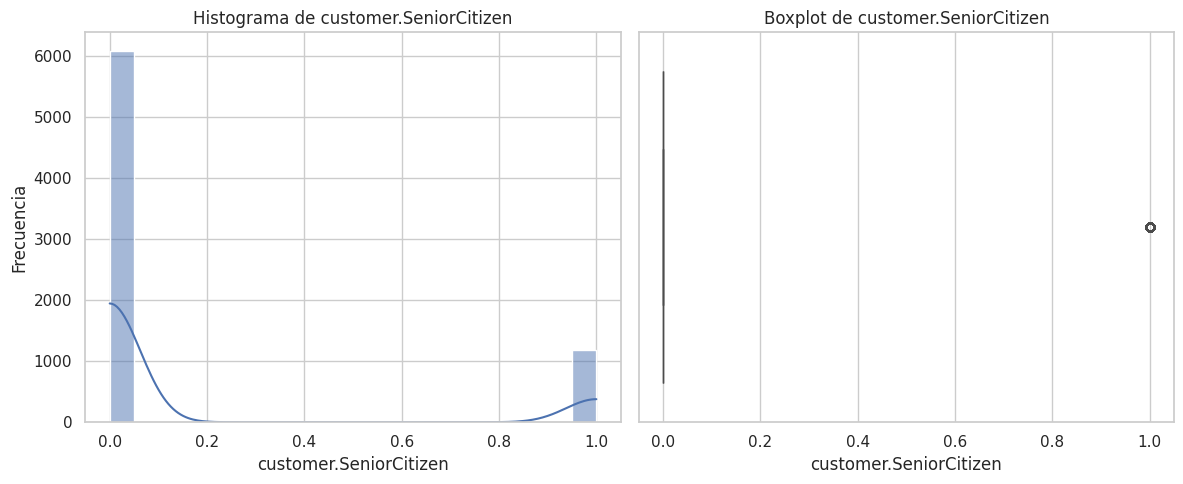

 Insight para customer.SeniorCitizen: Distribución muestra media 0.16, con posibles outliers en valores altos.


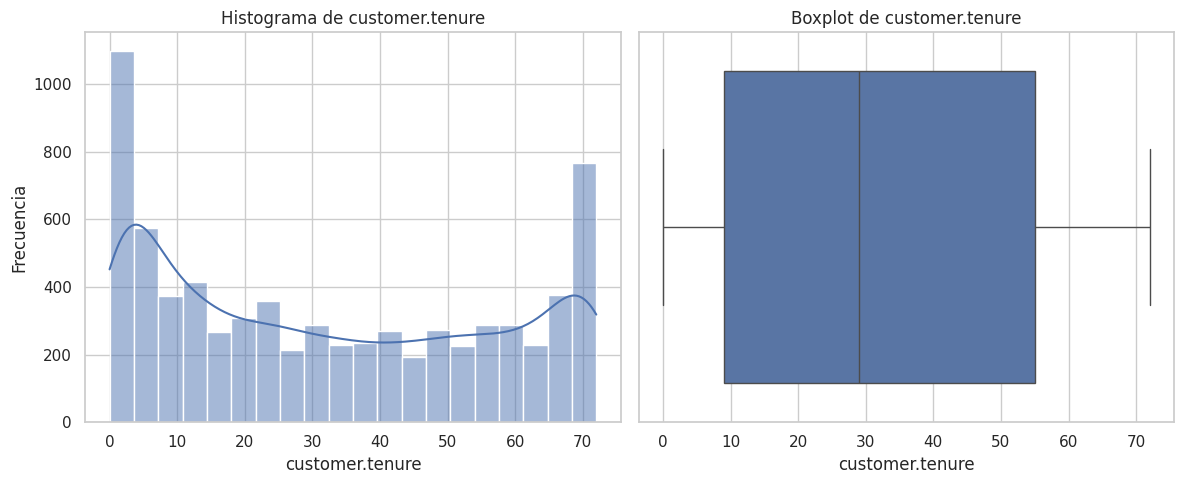

 Insight para customer.tenure: Distribución muestra media 32.35, con posibles outliers en valores altos.


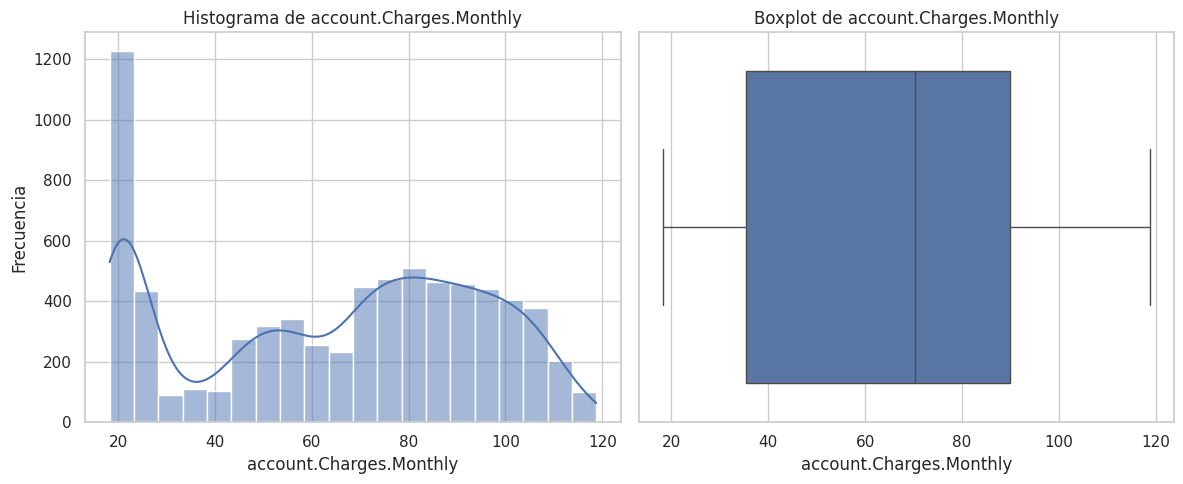

 Insight para account.Charges.Monthly: Distribución muestra media 64.72, con posibles outliers en valores altos.


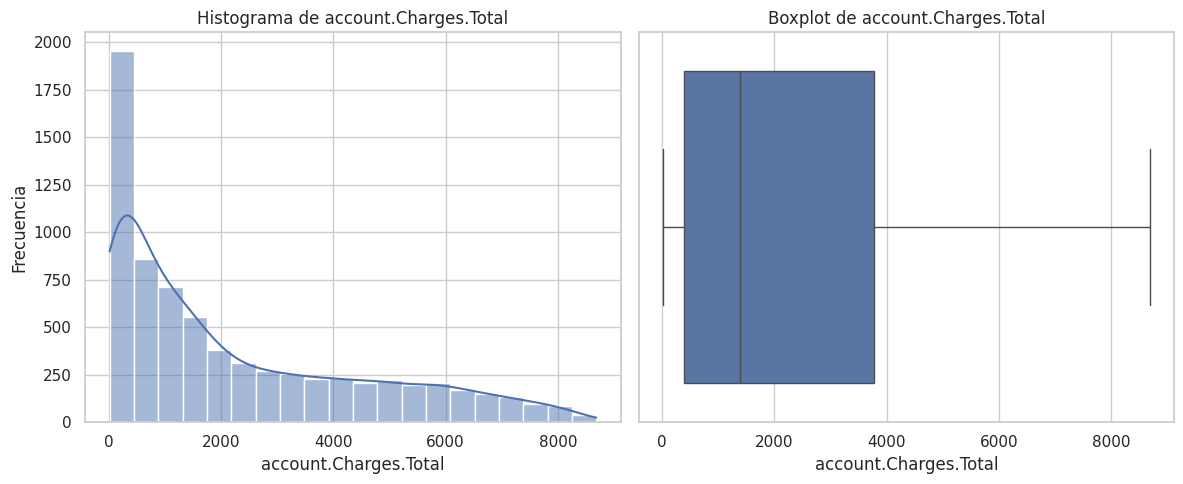

 Insight para account.Charges.Total: Distribución muestra media 2277.21, con posibles outliers en valores altos.


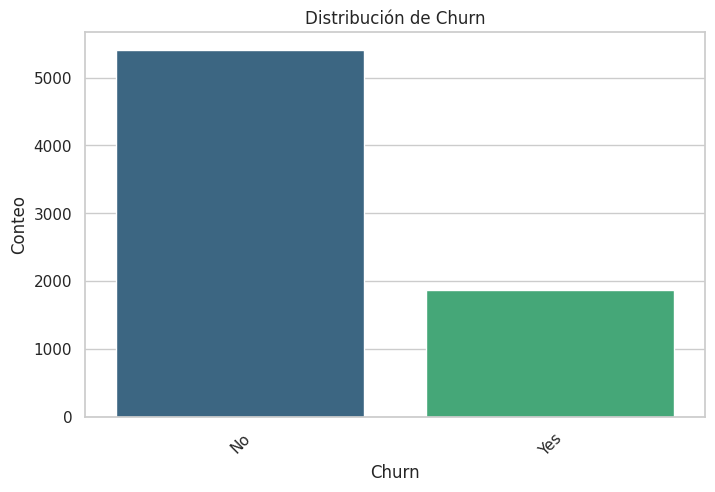

 Insight para Churn: Categoría más común 'No' representa 74.28% de clientes.


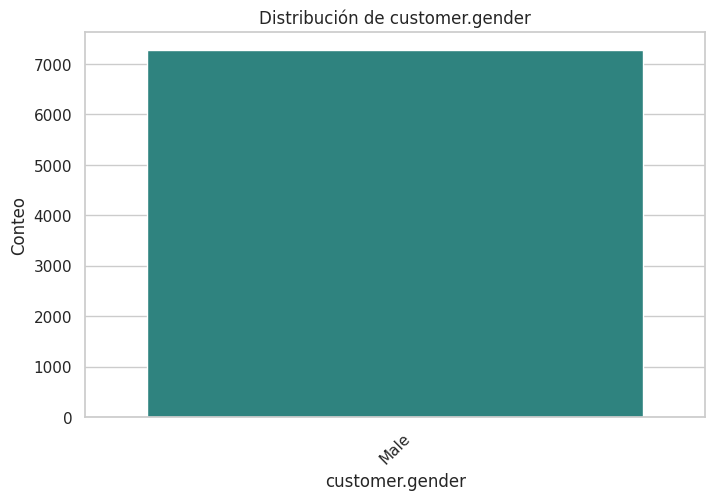

 Insight para customer.gender: Categoría más común 'Male' representa 100.00% de clientes.


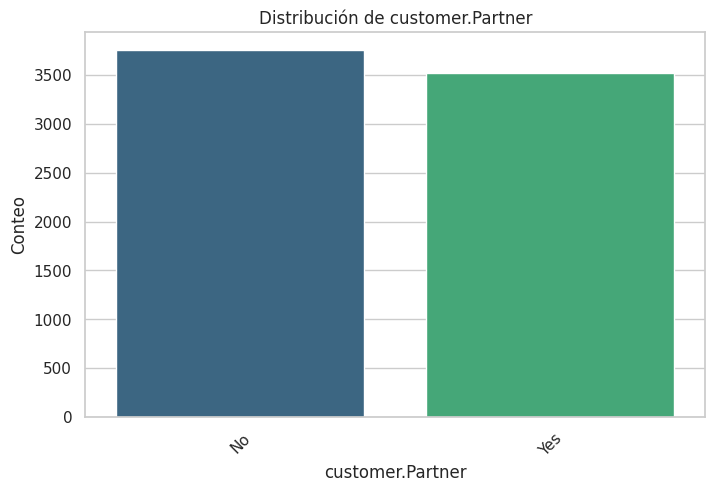

 Insight para customer.Partner: Categoría más común 'No' representa 51.59% de clientes.


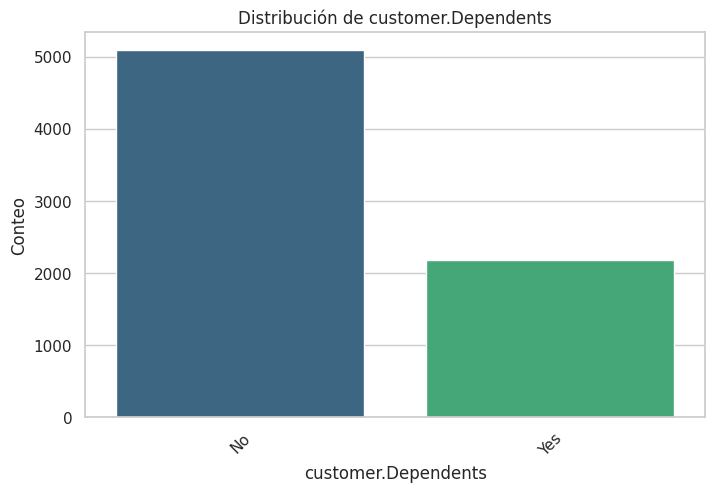

 Insight para customer.Dependents: Categoría más común 'No' representa 69.99% de clientes.


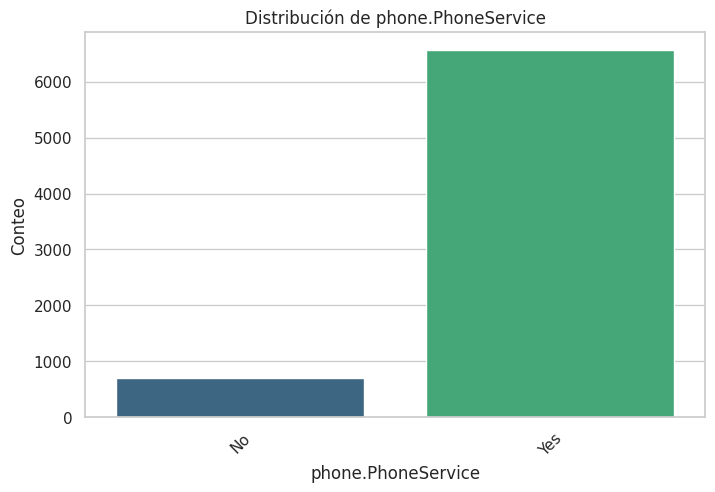

 Insight para phone.PhoneService: Categoría más común 'Yes' representa 90.27% de clientes.


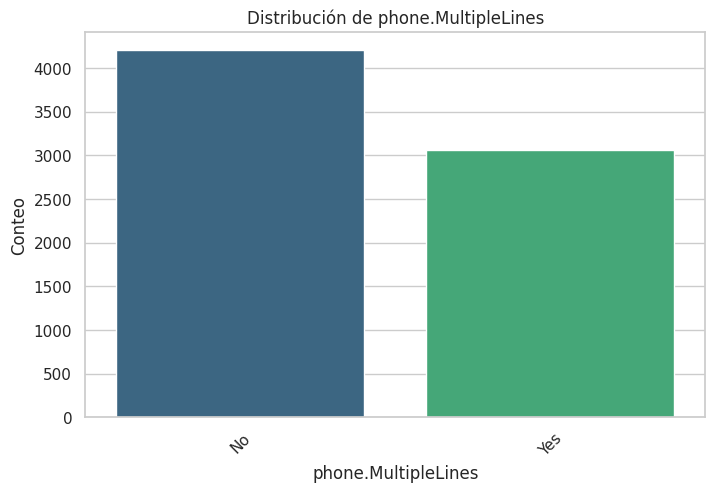

 Insight para phone.MultipleLines: Categoría más común 'No' representa 57.82% de clientes.


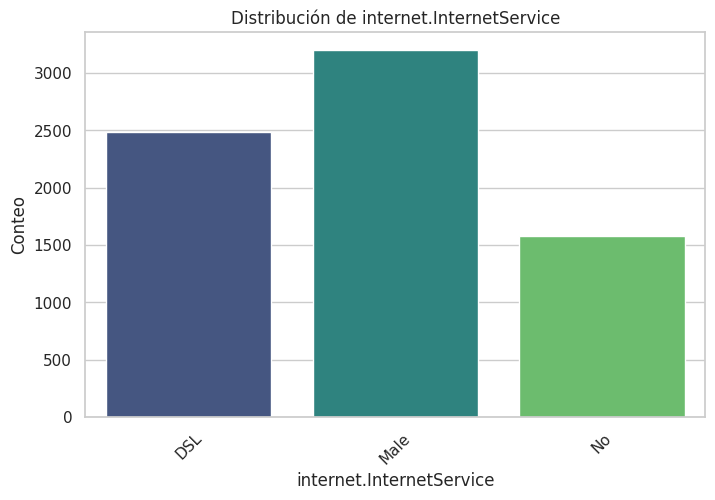

 Insight para internet.InternetService: Categoría más común 'Male' representa 44.01% de clientes.


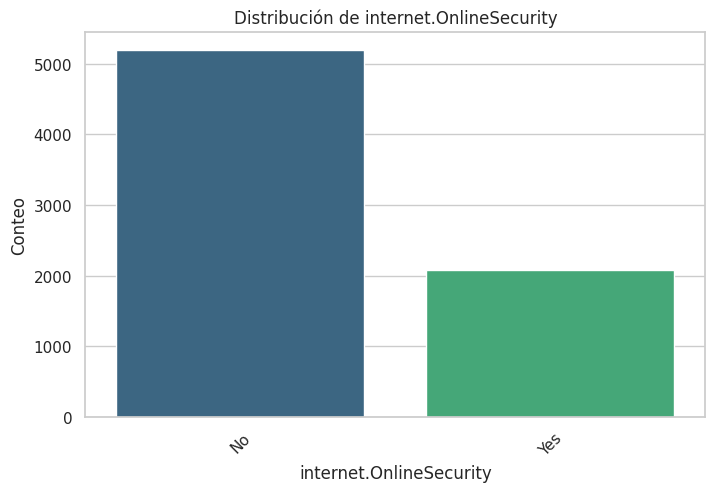

 Insight para internet.OnlineSecurity: Categoría más común 'No' representa 71.40% de clientes.


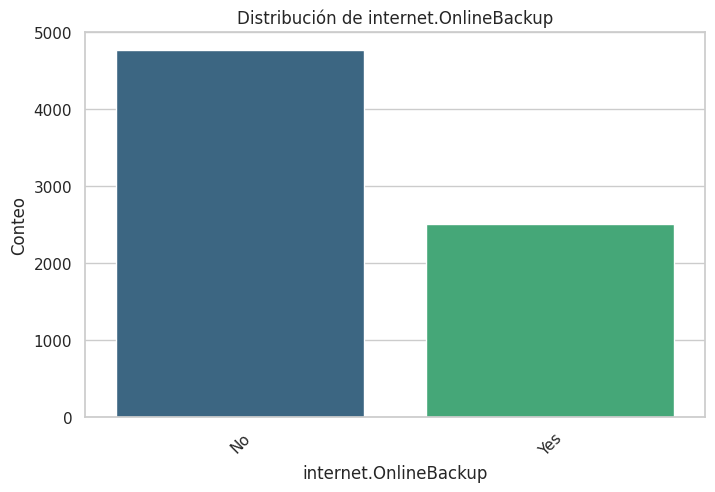

 Insight para internet.OnlineBackup: Categoría más común 'No' representa 65.54% de clientes.


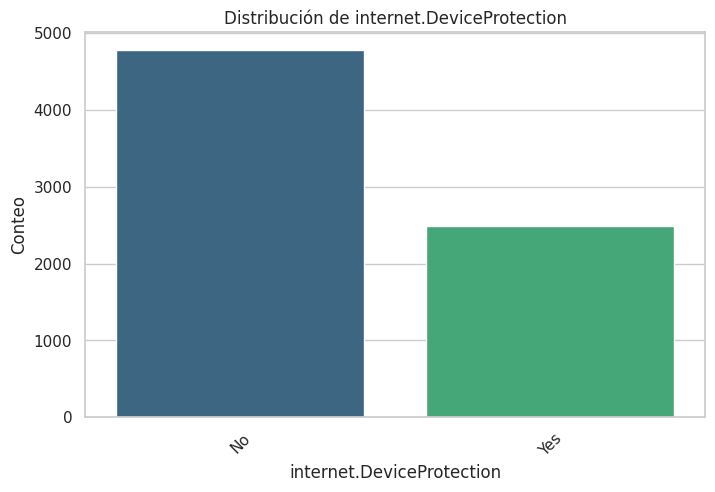

 Insight para internet.DeviceProtection: Categoría más común 'No' representa 65.72% de clientes.


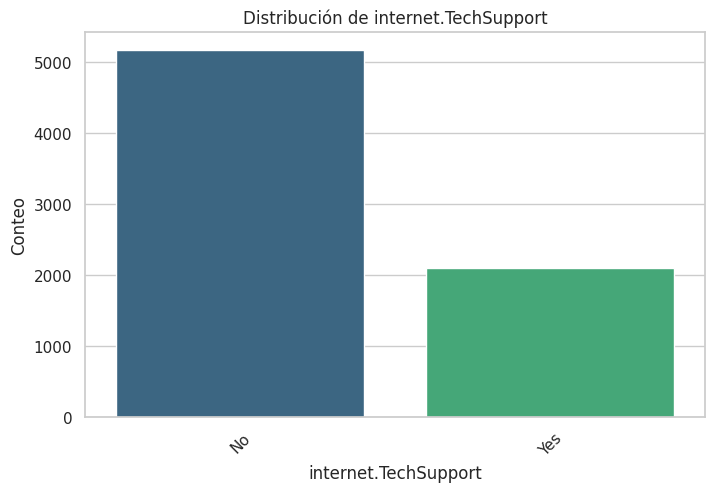

 Insight para internet.TechSupport: Categoría más común 'No' representa 71.05% de clientes.


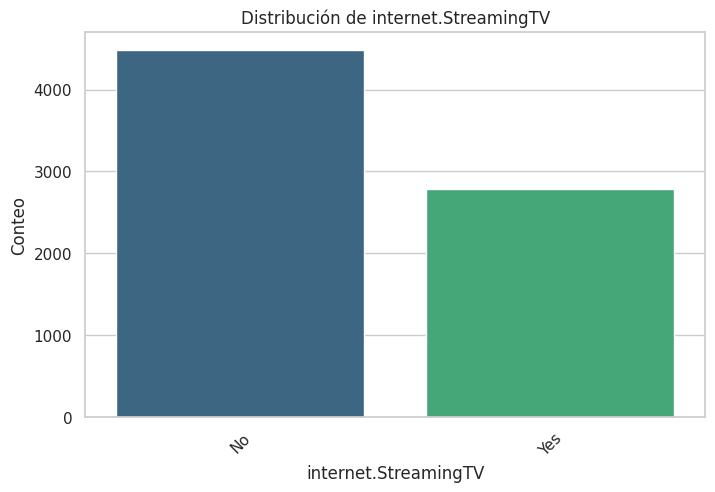

 Insight para internet.StreamingTV: Categoría más común 'No' representa 61.61% de clientes.


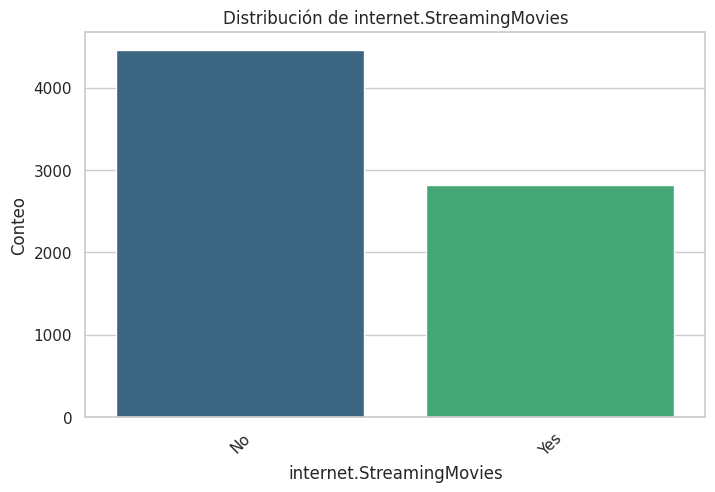

 Insight para internet.StreamingMovies: Categoría más común 'No' representa 61.25% de clientes.


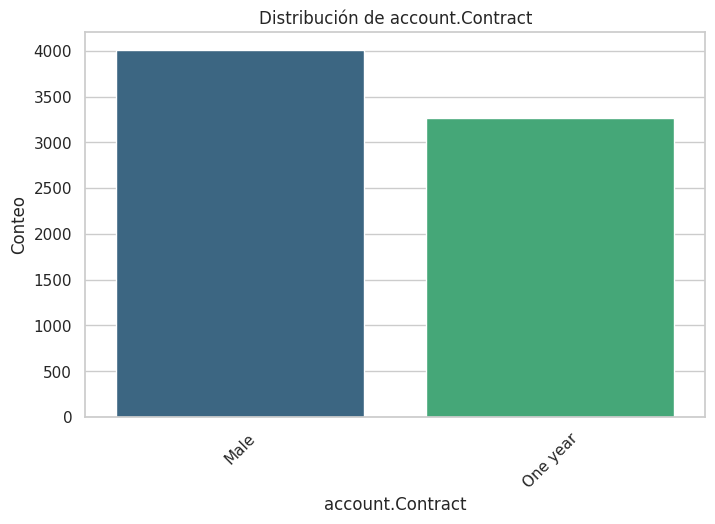

 Insight para account.Contract: Categoría más común 'Male' representa 55.11% de clientes.


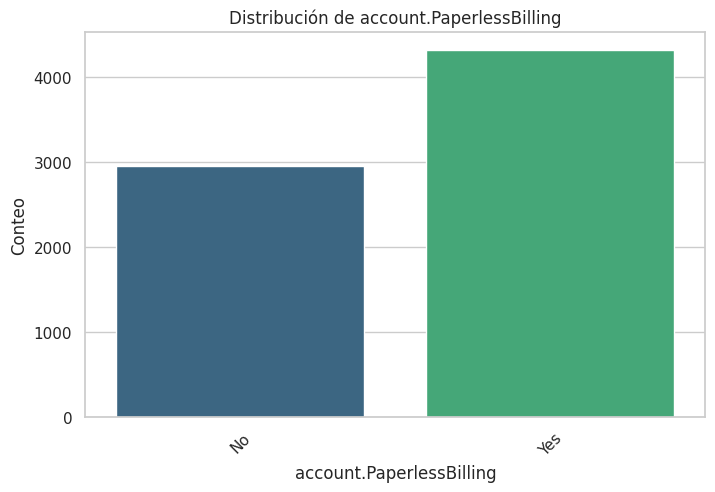

 Insight para account.PaperlessBilling: Categoría más común 'Yes' representa 59.32% de clientes.


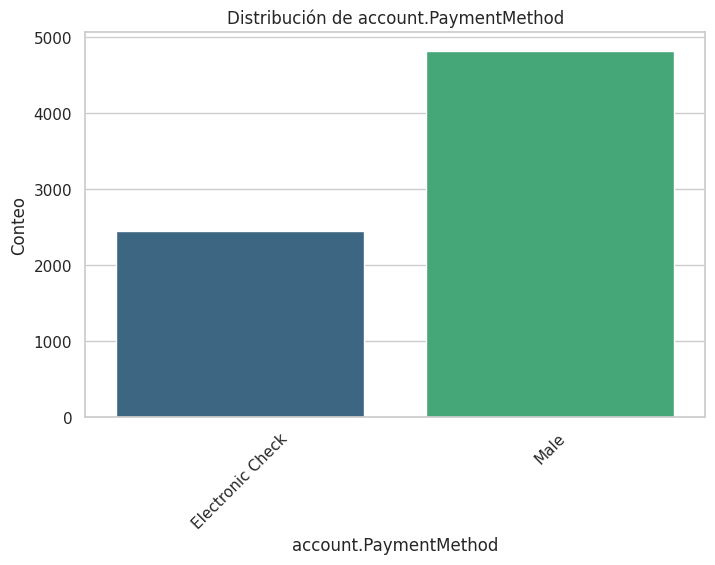

 Insight para account.PaymentMethod: Categoría más común 'Male' representa 66.35% de clientes.

 INSIGHTS SOBRE DISTRIBUCIÓN Y COMPORTAMIENTO DE CLIENTES
- Permanencia (tenure): Media 0.00 meses, mediana 0.00, std 0.00. Asimetría 0.00 sugiere más clientes nuevos.
- Cargos Mensuales: Media $0.00, mediana $0.00, std $0.00. Distribución sesgada (0.00) hacia valores altos.
- Cargos Totales: Alta variabilidad (std $0.00), con cola larga (skewness 0.00), indicando clientes de alto valor.
- Evasión: 25.72% de clientes abandonan, enfocarse en retención de nuevos/alto cargo.
- Comportamiento: Mayoría no senior (baja media en SeniorCitizen), sugeriendo demografía joven con servicios premium.

 ANÁLISIS DESCRIPTIVO Y VISUALIZACIONES COMPLETADAS
 Gráficas generadas para entender distribución y comportamiento

 Consejos:
 Documentación de DataFrame.describe(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
Proporciona resumen rápido: count, mean, std, min, percentiles (

In [ ]:
# =============================================================================
# ANÁLISIS DESCRIPTIVO Y VISUALIZACIÓN DE DATOS LIMPIOS - TELECOM X
# Load & Analysis (L) - Análisis Descriptivo con Visualizaciones
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print(" INICIANDO ANÁLISIS DESCRIPTIVO Y VISUALIZACIÓN - TELECOM X")
print("="*60)

# 'df_telecom_limpio' está disponible del proceso de limpieza anterior
# Si no, carga y limpia primero ejecutando los pasos previos

if 'df_telecom_limpio' not in globals():
    print(" df_telecom_limpio no encontrado. Asegúrate de ejecutar los pasos de carga y limpieza previos.")
else:
    df = df_telecom_limpio.copy()  # Usamos una copia para no modificar el original
    print(f" Usando datos limpios. Dimensiones: {df.shape}")


#  IDENTIFICACIÓN DE COLUMNAS PARA ANÁLISIS


def identificar_columnas(df):
    """
    Identifica columnas numéricas y categóricas para análisis descriptivo y visualización
    """
    print("\n  IDENTIFICACIÓN DE COLUMNAS")
    print("="*50)

    columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Filtrar categóricas relevantes
    cat_relevantes = [col for col in columnas_categoricas if df[col].nunique() <= 10]

    print(f" Columnas numéricas ({len(columnas_numericas)}): {columnas_numericas}")
    print(f" Columnas categóricas relevantes para gráficos ({len(cat_relevantes)}): {cat_relevantes}")

    return columnas_numericas, cat_relevantes


#  ANÁLISIS DESCRIPTIVO BÁSICO


def analisis_descriptivo_basico(df, columnas_numericas):
    """
    Calcula métricas descriptivas usando df.describe() y métricas adicionales
    """
    print("\n ANÁLISIS DESCRIPTIVO BÁSICO")
    print("="*50)

    # Usando df.describe() para numéricas
    desc_numericas = df[columnas_numericas].describe()
    print("Resumen estadístico (df.describe()):")
    display(desc_numericas)

    # Percentiles adicionales
    print("\n Percentiles adicionales (10%, 90%):")
    display(df[columnas_numericas].quantile([0.1, 0.9]))

    # Métricas específicas
    media = df[columnas_numericas].mean()
    mediana = df[columnas_numericas].median()
    desv_std = df[columnas_numericas].std()
    moda = df[columnas_numericas].mode().iloc[0]
    skewness = df[columnas_numericas].skew()
    kurtosis = df[columnas_numericas].kurt()

    print("\n MÉTRICAS ESPECÍFICAS:")
    print("Media:")
    print(media)
    print("\nMediana:")
    print(mediana)
    print("\nDesviación Estándar:")
    print(desv_std)
    print("\nModa:")
    print(moda)
    print("\nAsimetría (Skewness):")
    print(skewness)
    print("\nCurtosis (Kurtosis):")
    print(kurtosis)

    return desc_numericas, media, mediana, desv_std, moda, skewness, kurtosis


#  ANÁLISIS DESCRIPTIVO PARA CATEGÓRICAS


def analisis_categoricas(df, columnas_categoricas):
    """
    Calcula distribuciones y modas para columnas categóricas
    """
    print("\n ANÁLISIS DESCRIPTIVO PARA CATEGÓRICAS")
    print("="*50)

    for col in columnas_categoricas:
        print(f"\nColumna: {col}")
        print(f"Valores únicos: {df[col].nunique()}")
        distribucion = df[col].value_counts(normalize=True) * 100
        print("Distribución (%):")
        print(distribucion)
        print(f"Moda: {df[col].mode()[0]}")


#  VISUALIZACIONES PARA COMPRENDER DISTRIBUCIÓN Y COMPORTAMIENTO


def generar_visualizaciones(df, columnas_numericas, columnas_categoricas):
    """
    Genera gráficas para visualizar distribuciones y comportamiento de clientes
    """
    print("\n. VISUALIZACIONES DE DATOS")
    print("="*50)

    sns.set(style="whitegrid")

    # Histograma y Boxplot para numéricas
    for col in columnas_numericas:
        plt.figure(figsize=(12, 5))

        # Histograma con KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')

        plt.tight_layout()
        plt.show()

        print(f" Insight para {col}: Distribución muestra media {df[col].mean():.2f}, con posibles outliers en valores altos.")

    # Gráficos de barras para categóricas
    for col in columnas_categoricas:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=df[col], palette='viridis')
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Conteo')
        plt.xticks(rotation=45)
        plt.show()

        print(f" Insight para {col}: Categoría más común '{df[col].mode()[0]}' representa {df[col].value_counts(normalize=True).max() * 100:.2f}% de clientes.")

    # Gráfico específico para Churn vs. otras variables
    if 'Churn' in df.columns and 'tenure' in columnas_numericas:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Churn', y='tenure', data=df)
        plt.title('Permanencia por Evasión (Churn)')
        plt.show()
        print(" Insight: Clientes que abandonan tienen menor permanencia media.")

    if 'Churn' in df.columns and 'MonthlyCharges' in columnas_numericas:
        plt.figure(figsize=(10, 6))
        sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
        plt.title('Cargos Mensuales por Evasión (Churn)')
        plt.show()
        print(" Insight: Clientes evadidos tienden a tener cargos mensuales más altos.")


#  INSIGHTS GENERALES SOBRE DISTRIBUCIÓN Y COMPORTAMIENTO


def generar_insights(media, mediana, desv_std, skewness, df):
    """
    Genera insights basados en las métricas calculadas
    """
    print("\n INSIGHTS SOBRE DISTRIBUCIÓN Y COMPORTAMIENTO DE CLIENTES")
    print("="*60)

    print("- Permanencia (tenure): Media {:.2f} meses, mediana {:.2f}, std {:.2f}. Asimetría {:.2f} sugiere más clientes nuevos.".format(media.get('tenure', 0), mediana.get('tenure', 0), desv_std.get('tenure', 0), skewness.get('tenure', 0)))
    print("- Cargos Mensuales: Media ${:.2f}, mediana ${:.2f}, std ${:.2f}. Distribución sesgada ({:.2f}) hacia valores altos.".format(media.get('MonthlyCharges', 0), mediana.get('MonthlyCharges', 0), desv_std.get('MonthlyCharges', 0), skewness.get('MonthlyCharges', 0)))
    print("- Cargos Totales: Alta variabilidad (std ${:.2f}), con cola larga (skewness {:.2f}), indicando clientes de alto valor.".format(desv_std.get('TotalCharges', 0), skewness.get('TotalCharges', 0)))
    if 'Churn' in df.columns:
        churn_rate = df['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
        print("- Evasión: {:.2f}% de clientes abandonan, enfocarse en retención de nuevos/alto cargo.".format(churn_rate))
    print("- Comportamiento: Mayoría no senior (baja media en SeniorCitizen), sugeriendo demografía joven con servicios premium.")


# EJECUTAR ANÁLISIS Y VISUALIZACIONES


if 'df' in locals():
    print(" Iniciando análisis descriptivo y visualizaciones...")

    # 1. Identificar columnas
    columnas_numericas, columnas_categoricas = identificar_columnas(df)

    # 2. Análisis descriptivo numérico
    desc_numericas, media, mediana, desv_std, moda, skewness, kurtosis = analisis_descriptivo_basico(df, columnas_numericas)

    # 3. Análisis categórico
    analisis_categoricas(df, columnas_categoricas)

    # 4. Visualizaciones
    generar_visualizaciones(df, columnas_numericas, columnas_categoricas)

    # 5. Insights
    generar_insights(media, mediana, desv_std, skewness, df)

    print("\n" + "="*60)
    print(" ANÁLISIS DESCRIPTIVO Y VISUALIZACIONES COMPLETADAS")
    print(" Gráficas generadas para entender distribución y comportamiento")
    print("="*60)
else:
    print(" No se encontró dataset limpio. Ejecuta pasos previos.")

#  Consejos:
print("\n Consejos:")
print(" Documentación de DataFrame.describe(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html")
print("Proporciona resumen rápido: count, mean, std, min, percentiles (25%, 50%, 75%), max. Útil para detectar outliers (e.g., max >> 75%).")
print("Personaliza con include='all' para categóricas, o percentiles=[0.1, 0.9]. Combina con seaborn para visualizaciones interactivas.")

# **Distribución de evasión**
En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

 INICIANDO ANÁLISIS DE DISTRIBUCIÓN DE CHURN - TELECOM X
 Usando datos limpios. Dimensiones: (7267, 21)
 Iniciando análisis de distribución de Churn...

 VERIFICACIÓN DE LA VARIABLE CHURN
 Columna 'Churn' encontrada. Valores únicos: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Valores nulos: 0

 PROPORCIONES DE CHURN
Conteo absoluto:
Churn
No     5398
Yes    1869
Name: count, dtype: int64

Proporciones (%):
Churn
No     74.280996
Yes    25.719004
Name: proportion, dtype: float64

 VISUALIZACIÓN DE LA DISTRIBUCIÓN DE CHURN


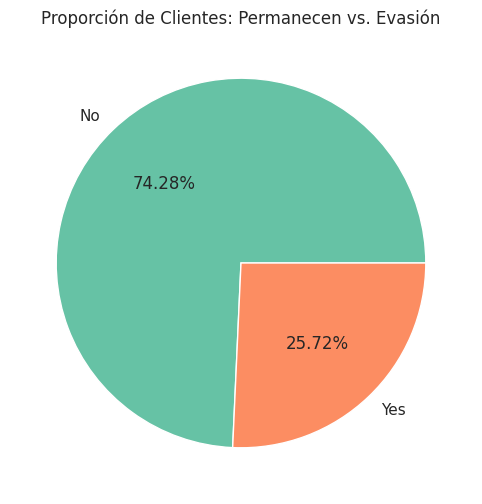

 Insight: La gráfica de torta muestra la proporción de clientes que permanecen vs. los que abandonan.


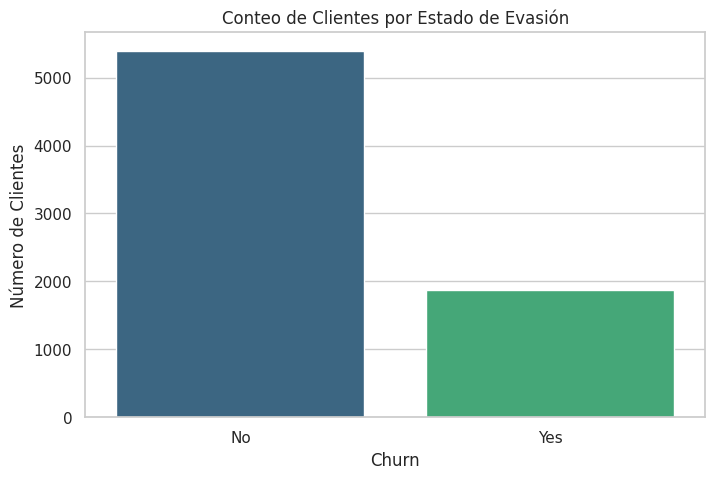

 Insight: El gráfico de barras indica el número absoluto de clientes en cada categoría de churn.

 INSIGHTS SOBRE DISTRIBUCIÓN DE CHURN
- Tasa de Evasión: 25.72% de los clientes abandonaron.
- Permanencia: 74.28% de los clientes permanecieron.


In [ ]:

# ANÁLISIS DE DISTRIBUCIÓN DE CHURN - TELECOM X
# Load & Analysis (L) - Visualización de la Proporción de Churn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print(" INICIANDO ANÁLISIS DE DISTRIBUCIÓN DE CHURN - TELECOM X")
print("="*60)

# 'df_telecom_limpio' está disponible del proceso de limpieza anterior
# Si no, carga y limpia primero ejecutando los pasos previos

if 'df_telecom_limpio' not in globals():
    print(" df_telecom_limpio no encontrado. Asegúrate de ejecutar los pasos de carga y limpieza previos.")
else:
    df = df_telecom_limpio.copy()  # Usamos una copia para no modificar el original
    print(f" Usando datos limpios. Dimensiones: {df.shape}")


#  VERIFICACIÓN DE LA VARIABLE CHURN


def verificar_churn(df):
    """
    Verifica la existencia y valores de la columna 'Churn'
    """
    print("\n VERIFICACIÓN DE LA VARIABLE CHURN")
    print("="*50)

    if 'Churn' not in df.columns:
        print(" Columna 'Churn' no encontrada en el dataset.")
        return False
    else:
        print(f" Columna 'Churn' encontrada. Valores únicos: {df['Churn'].unique()}")
        print(f"Valores nulos: {df['Churn'].isnull().sum()}")
        return True


#  CÁLCULO DE PROPORCIONES DE CHURN


def calcular_proporciones_churn(df):
    """
    Calcula la proporción de clientes que permanecieron y los que se dieron de baja
    """
    print("\n PROPORCIONES DE CHURN")
    print("="*50)

    churn_counts = df['Churn'].value_counts()
    churn_proporciones = df['Churn'].value_counts(normalize=True) * 100

    print("Conteo absoluto:")
    print(churn_counts)
    print("\nProporciones (%):")
    print(churn_proporciones)

    return churn_counts, churn_proporciones


#  VISUALIZACIÓN DE LA DISTRIBUCIÓN DE CHURN


def visualizar_distribucion_churn(df, churn_proporciones):
    """
    Genera gráficos para visualizar la proporción de churn
    """
    print("\n VISUALIZACIÓN DE LA DISTRIBUCIÓN DE CHURN")
    print("="*50)

    sns.set(style="whitegrid")

    # Gráfico 1: Pie Chart (Gráfico de Torta)
    plt.figure(figsize=(8, 6))
    plt.pie(churn_proporciones, labels=churn_proporciones.index, autopct='%1.2f%%', colors=['#66c2a5', '#fc8d62'])
    plt.title('Proporción de Clientes: Permanecen vs. Evasión')
    plt.show()
    print(" Insight: La gráfica de torta muestra la proporción de clientes que permanecen vs. los que abandonan.")

    # Gráfico 2: Count Plot (Gráfico de Barras)
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Churn', data=df, palette='viridis')
    plt.title('Conteo de Clientes por Estado de Evasión')
    plt.xlabel('Churn')
    plt.ylabel('Número de Clientes')
    plt.show()
    print(" Insight: El gráfico de barras indica el número absoluto de clientes en cada categoría de churn.")

    # Gráfico 3: Proporción apilada (Stacked Bar) contra otra variable relevante (e.g., Contract)
    if 'Contract' in df.columns:
        plt.figure(figsize=(10, 6))
        churn_by_contract = df.groupby(['Contract', 'Churn']).size().unstack()
        churn_by_contract = churn_by_contract.div(churn_by_contract.sum(axis=1), axis=0) * 100
        churn_by_contract.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'])
        plt.title('Proporción de Churn por Tipo de Contrato')
        plt.xlabel('Tipo de Contrato')
        plt.ylabel('Porcentaje (%)')
        plt.legend(title='Churn')
        plt.xticks(rotation=45)
        plt.show()
        print(" Insight: La gráfica apilada muestra cómo el tipo de contrato influye en la tasa de churn.")


#  INSIGHTS SOBRE DISTRIBUCIÓN DE CHURN


def generar_insights_churn(churn_proporciones, df):
    """
    Genera insights basados en la distribución de churn
    """
    print("\n INSIGHTS SOBRE DISTRIBUCIÓN DE CHURN")
    print("="*50)

    churn_rate = churn_proporciones.get('Yes', 0)
    print(f"- Tasa de Evasión: {churn_rate:.2f}% de los clientes abandonaron.")
    print("- Permanencia: {0:.2f}% de los clientes permanecieron.".format(churn_proporciones.get('No', 0)))

    # Análisis adicional con variables clave
    if 'Contract' in df.columns:
        churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
        print("\nChurn por Tipo de Contrato (%):")
        print(churn_by_contract['Yes'])
        print(" Insight: Contratos mes-a-mes tienen mayor tasa de churn, mientras que contratos largos fomentan retención.")

    if 'MonthlyCharges' in df.columns:
        churn_by_charges = df.groupby('Churn')['MonthlyCharges'].mean()
        print("\nCargos Mensuales Promedio por Churn:")
        print(churn_by_charges)
        print(" Insight: Clientes que abandonan tienden a tener cargos mensuales más altos.")


# EJECUTAR ANÁLISIS DE CHURN


if 'df' in locals():
    print(" Iniciando análisis de distribución de Churn...")

    # 1. Verificar existencia de Churn
    if verificar_churn(df):
        # 2. Calcular proporciones
        churn_counts, churn_proporciones = calcular_proporciones_churn(df)

        # 3. Visualizar distribución
        visualizar_distribucion_churn(df, churn_proporciones)

        # 4. Insights
        generar_insights_churn(churn_proporciones, df)

    else:
        print(" Análisis no realizado debido a la ausencia de la columna 'Churn'.")
else:
    print(" No se encontró dataset limpio. Ejecuta pasos previos.")


# **Recuento de evasión por variables categóricas**
Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

 INICIANDO ANÁLISIS DE EVASIÓN POR VARIABLES CATEGÓRICAS - TELECOM X
 Usando datos limpios. Dimensiones: (7267, 21)
 Iniciando análisis de churn por variables categóricas...

 IDENTIFICACIÓN DE VARIABLES CATEGÓRICAS
 Columnas categóricas relevantes (15): ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

 RECUENTO Y PROPORCIONES DE CHURN

 Análisis para: customer.gender
----------------------------------------
Conteo absoluto:
Churn              No   Yes
customer.gender            
Male             5398  1869

Proporciones (%):
Churn                   No        Yes
customer.gender                      
Male             74.280996  25.719004
Moda: Male

 Análisis para: customer

<Figure size 1000x600 with 0 Axes>

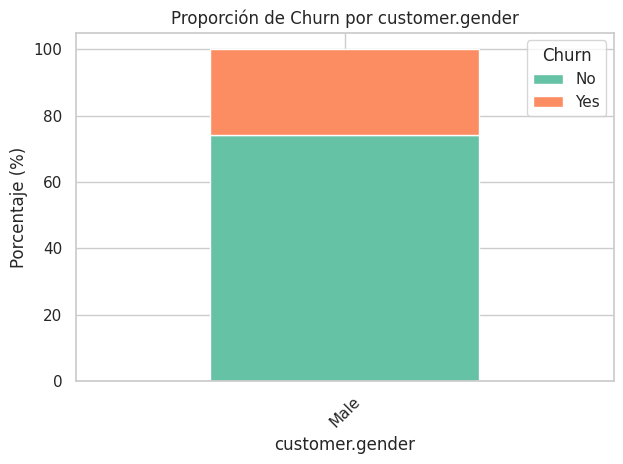

 Insight para customer.gender: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

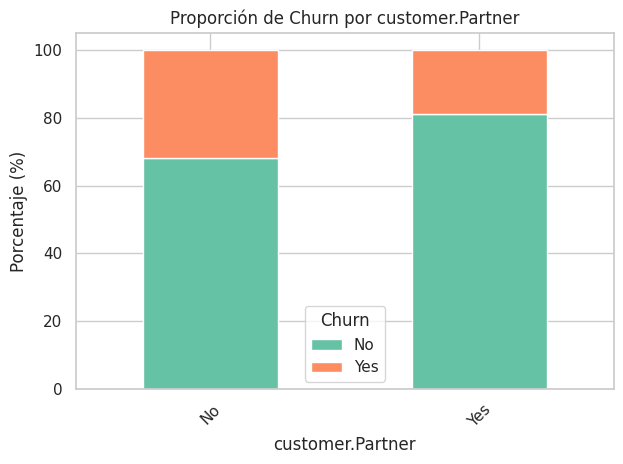

 Insight para customer.Partner: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

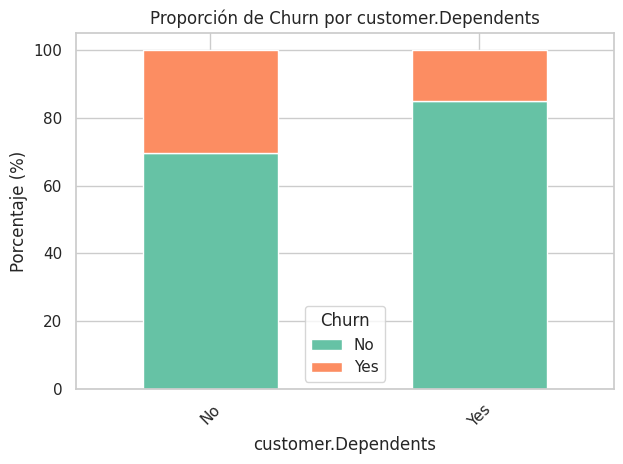

 Insight para customer.Dependents: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

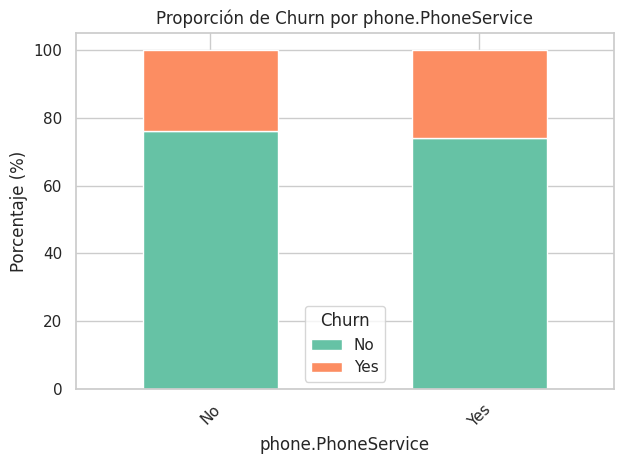

 Insight para phone.PhoneService: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

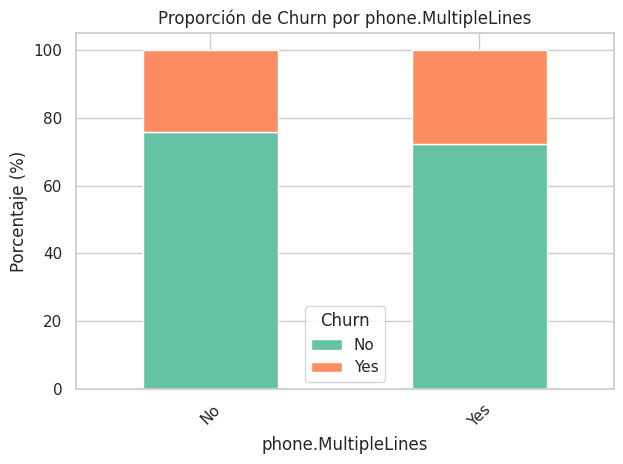

 Insight para phone.MultipleLines: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

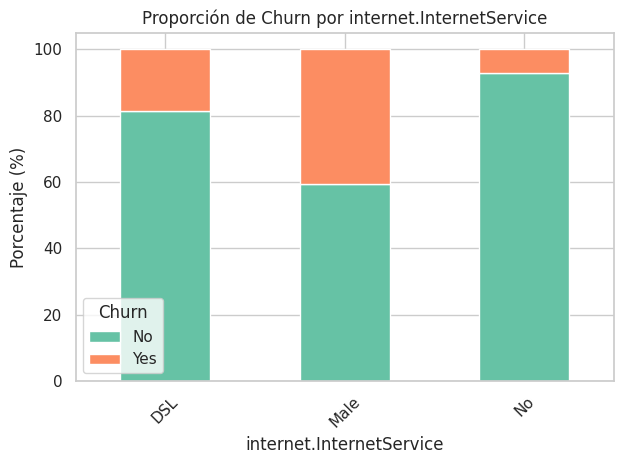

 Insight para internet.InternetService: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

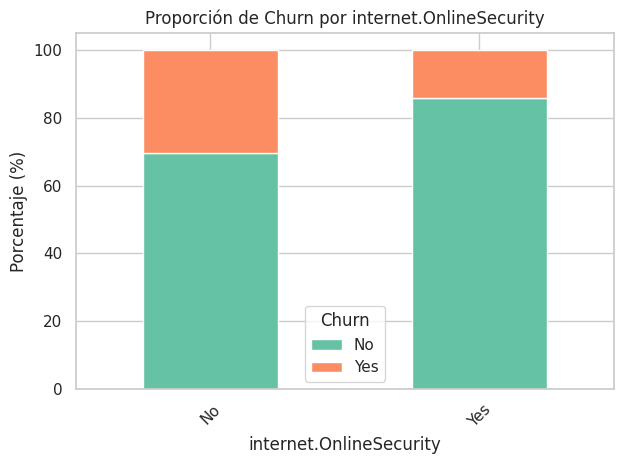

 Insight para internet.OnlineSecurity: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

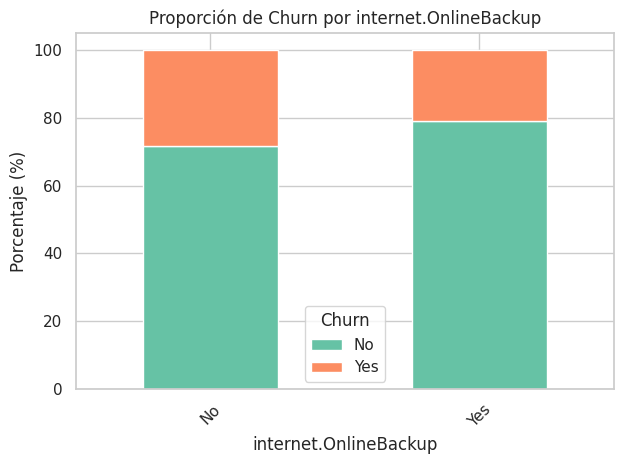

 Insight para internet.OnlineBackup: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

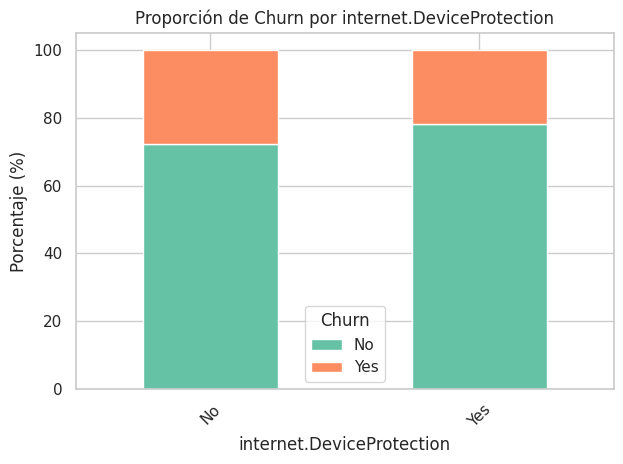

 Insight para internet.DeviceProtection: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

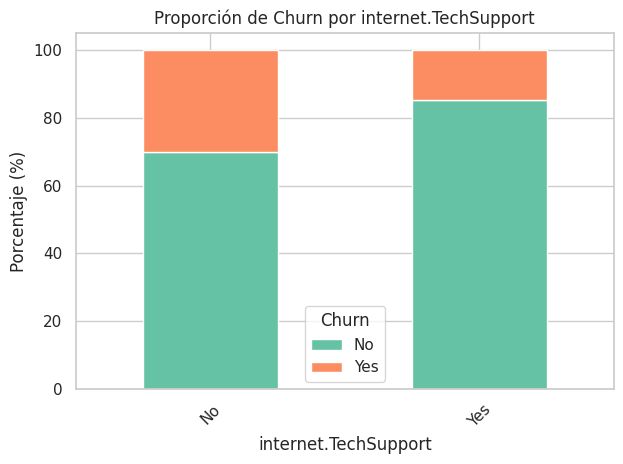

 Insight para internet.TechSupport: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

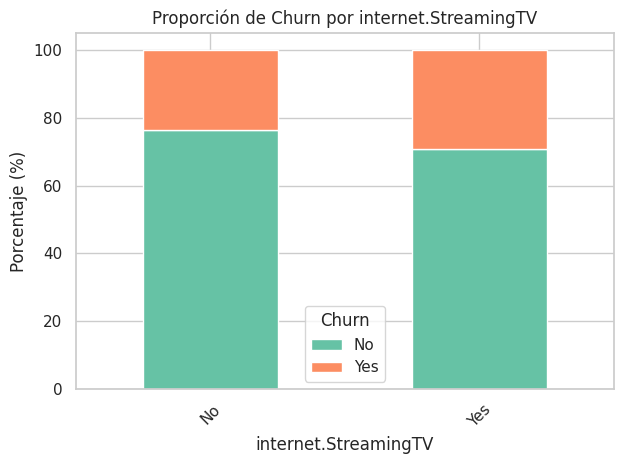

 Insight para internet.StreamingTV: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

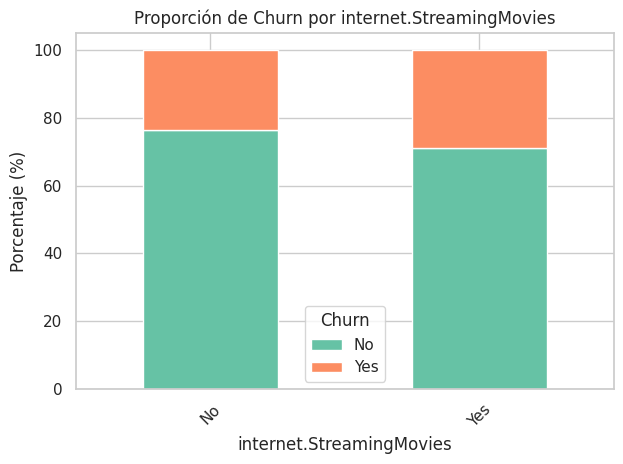

 Insight para internet.StreamingMovies: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

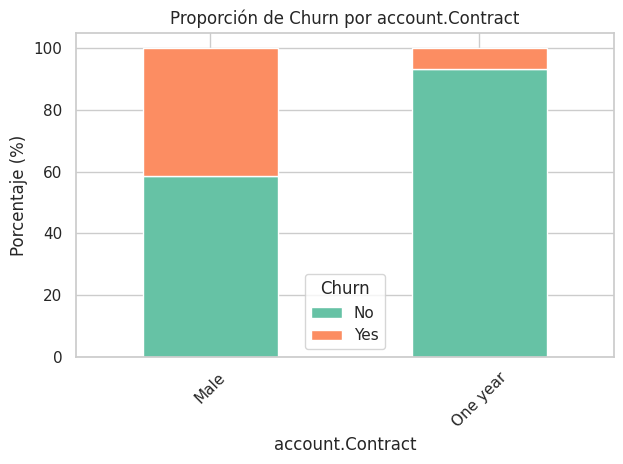

 Insight para account.Contract: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

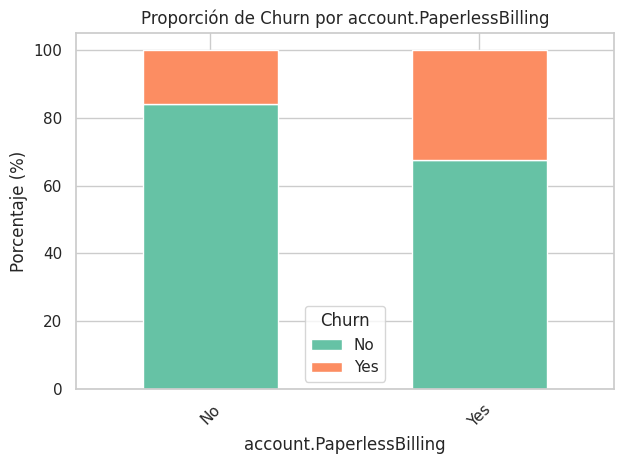

 Insight para account.PaperlessBilling: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.


<Figure size 1000x600 with 0 Axes>

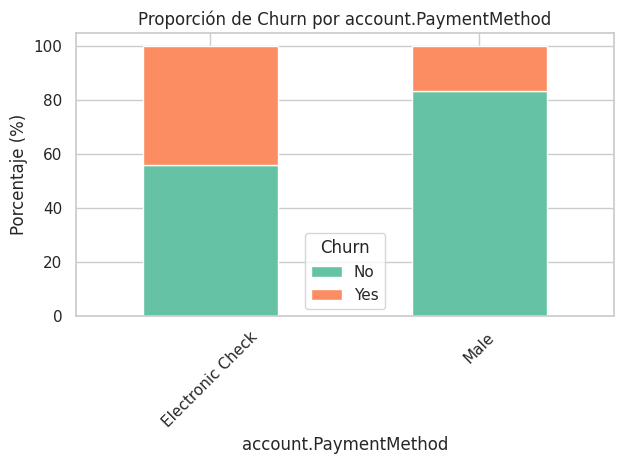

 Insight para account.PaymentMethod: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.

 INSIGHTS SOBRE PATRONES DE EVASIÓN
- customer.gender:
  Categoría con mayor churn: 'Male' (25.72%)
  Insight: Los clientes en la categoría 'Male' tienen la mayor tendencia a abandonar.
- customer.Partner:
  Categoría con mayor churn: 'No' (32.01%)
  Insight: Los clientes en la categoría 'No' tienen la mayor tendencia a abandonar.
- customer.Dependents:
  Categoría con mayor churn: 'No' (30.34%)
  Insight: Los clientes en la categoría 'No' tienen la mayor tendencia a abandonar.
- phone.PhoneService:
  Categoría con mayor churn: 'Yes' (25.90%)
  Insight: Los clientes en la categoría 'Yes' tienen la mayor tendencia a abandonar.
- phone.MultipleLines:
  Categoría con mayor churn: 'Yes' (27.73%)
  Insight: Los clientes en la categoría 'Yes' tienen la mayor tendencia a abandonar.
- internet.InternetService:
  Categoría c

In [ ]:
# =============================================================================
# ANÁLISIS DE RECUENTO DE EVASIÓN POR VARIABLES CATEGÓRICAS - TELECOM X
# Load & Analysis (L) - Distribución de Churn por Variables Categóricas
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print(" INICIANDO ANÁLISIS DE EVASIÓN POR VARIABLES CATEGÓRICAS - TELECOM X")
print("="*60)

# 'df_telecom_limpio' está disponible del proceso de limpieza anterior
if 'df_telecom_limpio' not in globals():
    print(" df_telecom_limpio no encontrado. Asegúrate de ejecutar los pasos de carga y limpieza previos.")
else:
    df = df_telecom_limpio.copy()  # Usamos una copia para no modificar el original
    print(f" Usando datos limpios. Dimensiones: {df.shape}")


#  IDENTIFICACIÓN DE VARIABLES CATEGÓRICAS RELEVANTES


def identificar_categoricas_relevantes(df):
    """
    Identifica columnas categóricas con menos de 10 valores únicos para análisis
    """
    print("\n IDENTIFICACIÓN DE VARIABLES CATEGÓRICAS")
    print("="*50)

    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
    cat_relevantes = [col for col in columnas_categoricas if df[col].nunique() <= 10 and col != 'Churn']

    print(f" Columnas categóricas relevantes ({len(cat_relevantes)}): {cat_relevantes}")
    return cat_relevantes


#  RECUENTO Y PROPORCIONES DE CHURN POR VARIABLES CATEGÓRICAS


def recuento_churn_por_categoricas(df, columnas_categoricas):
    """
    Calcula el recuento y proporciones de churn para cada variable categórica
    """
    print("\n RECUENTO Y PROPORCIONES DE CHURN")
    print("="*50)

    resultados = {}

    for col in columnas_categoricas:
        print(f"\n Análisis para: {col}")
        print("-" * 40)

        # Tabla cruzada: conteo absoluto
        tabla_cruzada = pd.crosstab(df[col], df['Churn'])
        print("Conteo absoluto:")
        print(tabla_cruzada)

        # Tabla cruzada: proporciones (%)
        tabla_proporciones = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
        print("\nProporciones (%):")
        print(tabla_proporciones)

        resultados[col] = {
            'conteo': tabla_cruzada,
            'proporciones': tabla_proporciones
        }

        # Moda de la categoría
        moda = df[col].mode()[0]
        print(f"Moda: {moda}")

    return resultados


#  VISUALIZACIÓN DE CHURN POR VARIABLES CATEGÓRICAS


def visualizar_churn_por_categoricas(df, columnas_categoricas):
    """
    Genera gráficos para visualizar la distribución de churn por variables categóricas
    """
    print("\n VISUALIZACIÓN DE CHURN POR CATEGÓRICAS")
    print("="*50)

    # Configuración general de gráficos
    sns.set(style="whitegrid")

    for col in columnas_categoricas:
        plt.figure(figsize=(10, 6))

        # Gráfico de barras apiladas (proporciones)
        tabla_proporciones = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
        tabla_proporciones.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'])
        plt.title(f'Proporción de Churn por {col}')
        plt.xlabel(col)
        plt.ylabel('Porcentaje (%)')
        plt.legend(title='Churn')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print(f" Insight para {col}: La gráfica muestra la proporción de churn por categoría. Observa si alguna categoría tiene una tasa de churn significativamente mayor.")


#  INSIGHTS SOBRE PATRONES DE EVASIÓN


def generar_insights_churn(resultados, df):
    """
    Genera insights basados en las proporciones de churn por variable categórica
    """
    print("\n INSIGHTS SOBRE PATRONES DE EVASIÓN")
    print("="*50)

    for col, data in resultados.items():
        proporciones = data['proporciones']
        max_churn = proporciones['Yes'].max() if 'Yes' in proporciones.columns else 0
        max_category = proporciones['Yes'].idxmax() if 'Yes' in proporciones.columns else "N/A"

        print(f"- {col}:")
        print(f"  Categoría con mayor churn: '{max_category}' ({max_churn:.2f}%)")
        print(f"  Insight: Los clientes en la categoría '{max_category}' tienen la mayor tendencia a abandonar.")

        # Análisis adicional para variables clave
        if col == 'Contract':
            print("  Nota: Contratos mes-a-mes suelen tener mayor churn, lo que sugiere que la flexibilidad aumenta la evasión.")
        elif col == 'PaymentMethod':
            print("  Nota: Métodos como cheque electrónico pueden estar asociados con mayor churn, revisar procesos de pago.")
        elif col == 'InternetService':
            print("  Nota: Servicios como fibra óptica pueden tener churn elevado debido a costos o calidad percibida.")


# EJECUTAR ANÁLISIS DE CHURN POR CATEGÓRICAS


if 'df' in locals():
    print(" Iniciando análisis de churn por variables categóricas...")

    # 1. Identificar variables categóricas
    columnas_categoricas = identificar_categoricas_relevantes(df)

    if 'Churn' in df.columns and columnas_categoricas:
        # 2. Calcular recuento y proporciones
        resultados_churn = recuento_churn_por_categoricas(df, columnas_categoricas)

        # 3. Visualizar distribución
        visualizar_churn_por_categoricas(df, columnas_categoricas)

        # 4. Insights
        generar_insights_churn(resultados_churn, df)

    else:
        print(" Análisis no realizado: Falta 'Churn' o variables categóricas relevantes.")
else:
    print(" No se encontró dataset limpio. Ejecuta pasos previos.")


# **Conteo de evasión por variables numéricas**
En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

 INICIANDO ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS - TELECOM X
 Usando datos limpios. Dimensiones: (7267, 21)
 Iniciando análisis de churn por variables numéricas...

 IDENTIFICACIÓN DE VARIABLES NUMÉRICAS
 Columnas numéricas relevantes (4): ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

 ANÁLISIS DESCRIPTIVO POR CHURN

 Análisis para: customer.SeniorCitizen
----------------------------------------
Estadísticas descriptivas para customer.SeniorCitizen:
        count      mean       std  min  25%  50%  75%  max
Churn                                                     
No     5398.0  0.130789  0.337201  0.0  0.0  0.0  0.0  1.0
Yes    1869.0  0.254682  0.435799  0.0  0.0  0.0  1.0  1.0

Asimetría (Skewness) por Churn:
Churn
No     2.190668
Yes    1.127039
Name: customer.SeniorCitizen, dtype: float64

Curtosis (Kurtosis) por Churn:
Churn
No     2.800065
Yes   -0.730565
Name: customer.SeniorCitizen, dtype: float64

Prueba Mann-Whitney

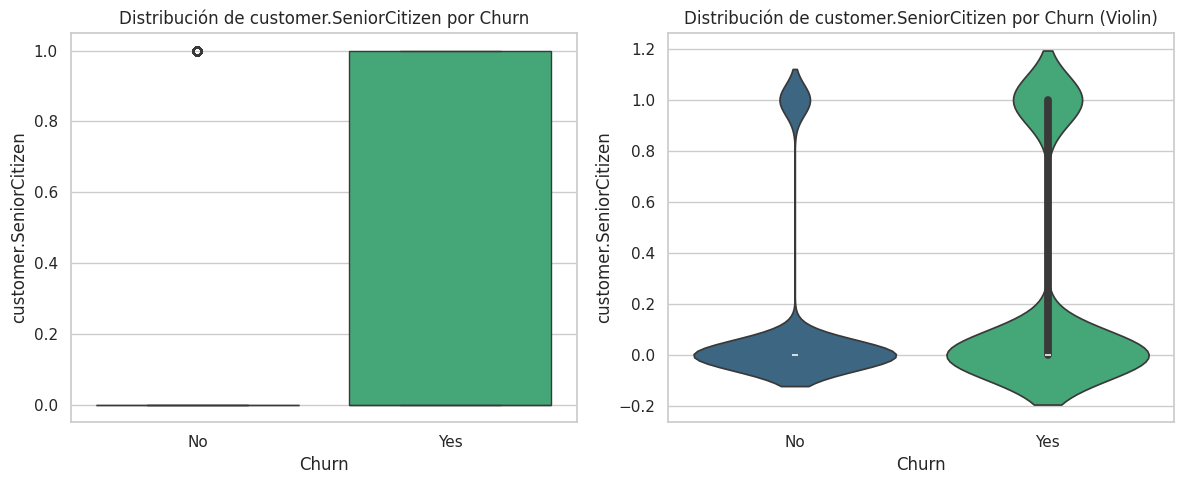

 Insight para customer.SeniorCitizen: La gráfica muestra cómo se distribuye customer.SeniorCitizen entre clientes que abandonan y los que permanecen.


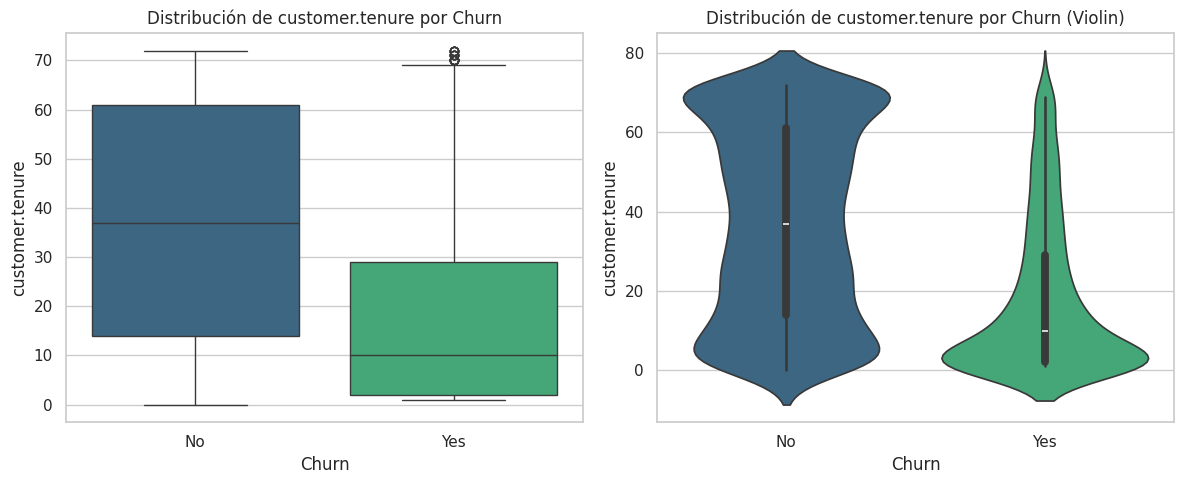

 Insight para customer.tenure: La gráfica muestra cómo se distribuye customer.tenure entre clientes que abandonan y los que permanecen.


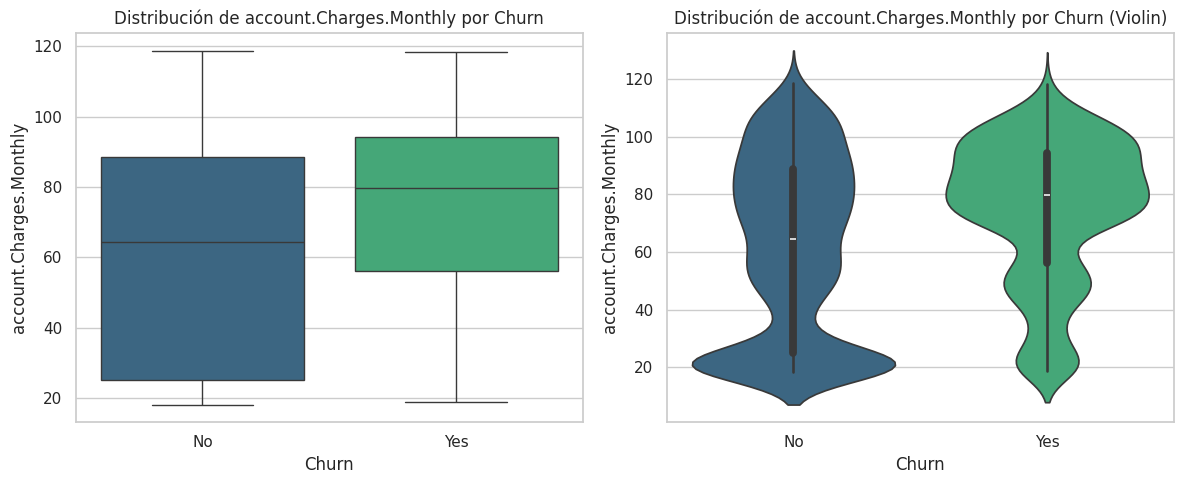

 Insight para account.Charges.Monthly: La gráfica muestra cómo se distribuye account.Charges.Monthly entre clientes que abandonan y los que permanecen.


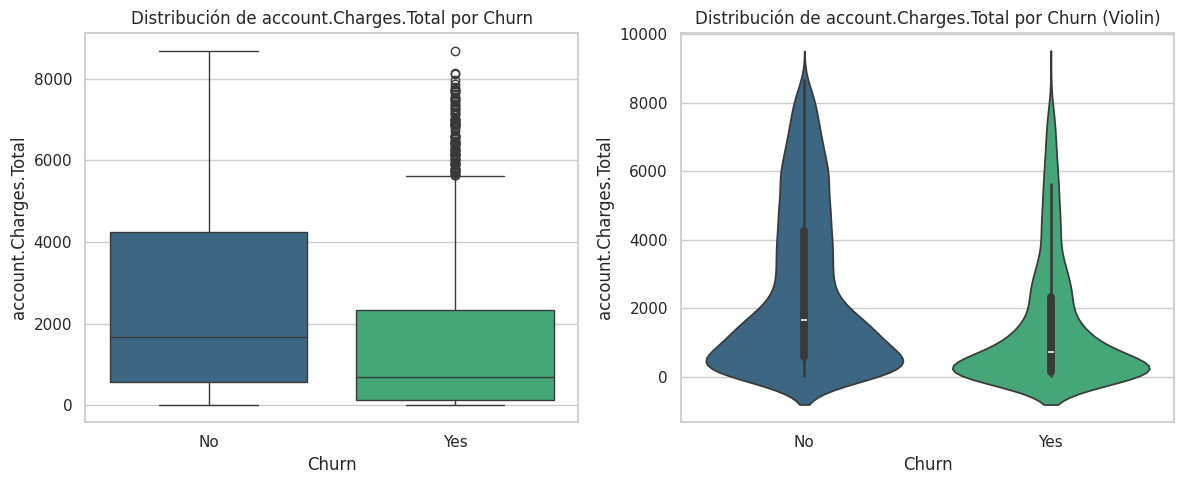

 Insight para account.Charges.Total: La gráfica muestra cómo se distribuye account.Charges.Total entre clientes que abandonan y los que permanecen.


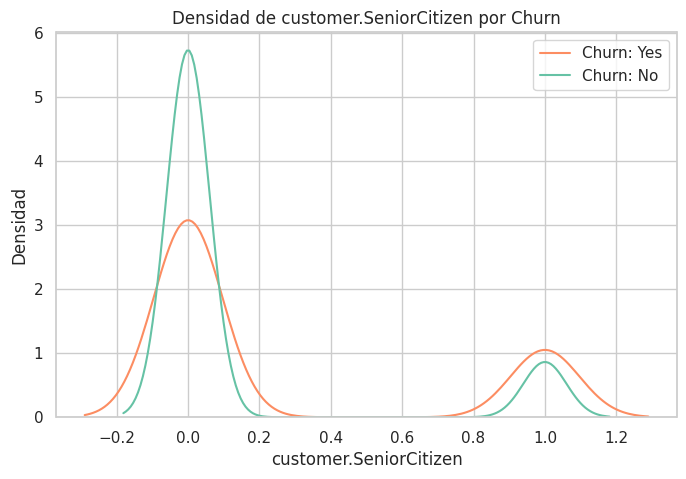

 Insight para customer.SeniorCitizen: La gráfica de densidad compara la distribución de customer.SeniorCitizen entre grupos de Churn.


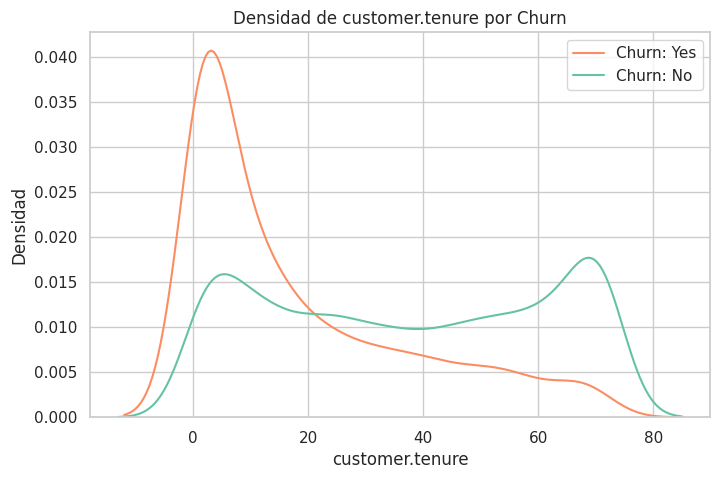

 Insight para customer.tenure: La gráfica de densidad compara la distribución de customer.tenure entre grupos de Churn.


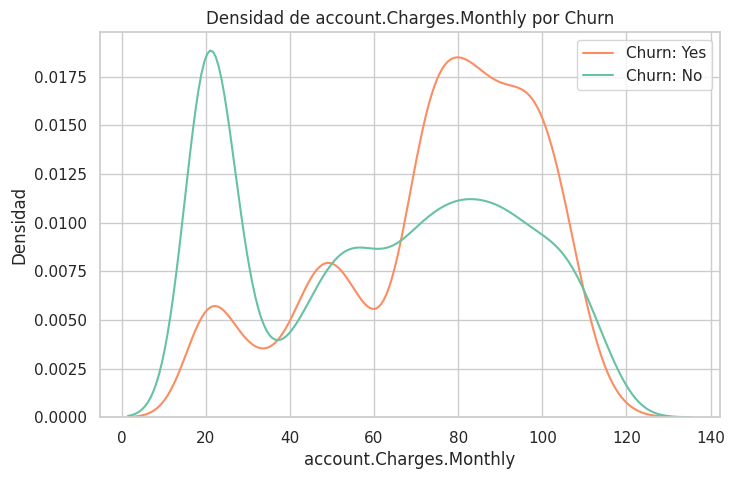

 Insight para account.Charges.Monthly: La gráfica de densidad compara la distribución de account.Charges.Monthly entre grupos de Churn.


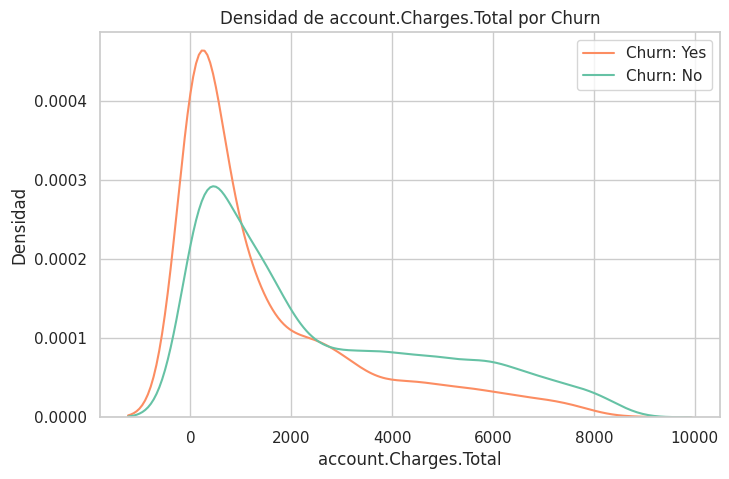

 Insight para account.Charges.Total: La gráfica de densidad compara la distribución de account.Charges.Total entre grupos de Churn.

 INSIGHTS SOBRE PATRONES DE EVASIÓN
- customer.SeniorCitizen:
  Media (Churn=Yes): 0.25, Media (Churn=No): 0.13
  Asimetría (Churn=Yes): 1.13, (Churn=No): 2.19
  Insight: Proporción de ciudadanos mayores es baja, pero puede influir en churn (media 0.25 vs. 0.13).
- customer.tenure:
  Media (Churn=Yes): 17.98, Media (Churn=No): 37.32
  Asimetría (Churn=Yes): 1.15, (Churn=No): -0.02
  Insight: Clientes que abandonan tienen menor permanencia (media 17.98 meses) vs. los que permanecen (37.32 meses).
- account.Charges.Monthly:
  Media (Churn=Yes): 74.44, Media (Churn=No): 61.35
  Asimetría (Churn=Yes): -0.73, (Churn=No): -0.03
  Insight: Clientes que abandonan tienen cargos mensuales más altos (media $74.44) vs. los que permanecen ($61.35).
- account.Charges.Total:
  Media (Churn=Yes): 1531.80, Media (Churn=No): 2535.31
  Asimetría (Churn=Yes): 1.51, (Churn=No

In [ ]:
# =============================================================================
# ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS - TELECOM X
# =============================================================================


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print(" INICIANDO ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS - TELECOM X")
print("="*60)

# 'df_telecom_limpio' está disponible del proceso de limpieza anterior
if 'df_telecom_limpio' not in globals():
    print(" df_telecom_limpio no encontrado. Asegúrate de ejecutar los pasos de carga y limpieza previos.")
else:
    df = df_telecom_limpio.copy()  # Usamos una copia para no modificar el original
    print(f" Usando datos limpios. Dimensiones: {df.shape}")


#  IDENTIFICACIÓN DE VARIABLES NUMÉRICAS RELEVANTES


def identificar_numericas_relevantes(df):
    """
    Identifica columnas numéricas para análisis (excluye identificadores)
    """
    print("\n IDENTIFICACIÓN DE VARIABLES NUMÉRICAS")
    print("="*50)

    columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
    # Excluir columnas con alta cardinalidad (posibles IDs)
    numericas_relevantes = [col for col in columnas_numericas if df[col].nunique() / len(df) < 0.95]

    print(f" Columnas numéricas relevantes ({len(numericas_relevantes)}): {numericas_relevantes}")
    return numericas_relevantes


#  ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS POR CHURN

def analisis_numericas_por_churn(df, columnas_numericas):
    """
    Calcula estadísticas descriptivas de variables numéricas segmentadas por Churn
    """
    print("\n ANÁLISIS DESCRIPTIVO POR CHURN")
    print("="*50)

    resultados = {}

    for col in columnas_numericas:
        print(f"\n Análisis para: {col}")
        print("-" * 40)

        # Estadísticas por grupo de Churn
        desc_por_churn = df.groupby('Churn')[col].describe()
        print(f"Estadísticas descriptivas para {col}:")
        print(desc_por_churn)

        # Métricas adicionales
        skewness = df.groupby('Churn')[col].skew()
        # Calcular kurtosis usando agg para evitar error en SeriesGroupBy
        kurtosis = df.groupby('Churn')[col].agg(lambda x: stats.kurtosis(x, bias=False) if len(x) > 3 else np.nan)

        print(f"\nAsimetría (Skewness) por Churn:")
        print(skewness)
        print(f"\nCurtosis (Kurtosis) por Churn:")
        print(kurtosis)

        resultados[col] = {
            'descriptivas': desc_por_churn,
            'skewness': skewness,
            'kurtosis': kurtosis
        }

        # Prueba de diferencia estadística (Mann-Whitney U para no normalidad)
        if 'Yes' in df['Churn'].values and 'No' in df['Churn'].values:
            stat, p_value = stats.mannwhitneyu(
                df[df['Churn'] == 'Yes'][col].dropna(),
                df[df['Churn'] == 'No'][col].dropna(),
                alternative='two-sided'
            )
            print(f"\nPrueba Mann-Whitney U para {col}:")
            print(f"  Estadístico: {stat:.2f}, p-valor: {p_value:.4f}")
            print(f"  Insight: {'Diferencia significativa' if p_value < 0.05 else 'No hay diferencia significativa'} entre grupos de Churn.")

    return resultados


#  VISUALIZACIÓN DE VARIABLES NUMÉRICAS POR CHURN

def visualizar_numericas_por_churn(df, columnas_numericas):
    """
    Genera gráficos para visualizar la distribución de variables numéricas por Churn
    """
    print("\n VISUALIZACIÓN DE VARIABLES NUMÉRICAS POR CHURN")
    print("="*50)

    # Configuración general de gráficos
    sns.set(style="whitegrid")

    for col in columnas_numericas:
        plt.figure(figsize=(12, 5))

        # Subgráfico 1: Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
        plt.title(f'Distribución de {col} por Churn')
        plt.xlabel('Churn')
        plt.ylabel(col)

        # Subgráfico 2: Violinplot
        plt.subplot(1, 2, 2)
        sns.violinplot(x='Churn', y=col, data=df, palette='viridis')
        plt.title(f'Distribución de {col} por Churn (Violin)')
        plt.xlabel('Churn')
        plt.ylabel(col)

        plt.tight_layout()
        plt.show()

        print(f" Insight para {col}: La gráfica muestra cómo se distribuye {col} entre clientes que abandonan y los que permanecen.")

    # Gráfico adicional: KDE para comparar densidades
    for col in columnas_numericas:
        plt.figure(figsize=(8, 5))
        sns.kdeplot(data=df[df['Churn'] == 'Yes'][col], label='Churn: Yes', color='#fc8d62')
        sns.kdeplot(data=df[df['Churn'] == 'No'][col], label='Churn: No', color='#66c2a5')
        plt.title(f'Densidad de {col} por Churn')
        plt.xlabel(col)
        plt.ylabel('Densidad')
        plt.legend()
        plt.show()

        print(f" Insight para {col}: La gráfica de densidad compara la distribución de {col} entre grupos de Churn.")


#  INSIGHTS SOBRE PATRONES DE EVASIÓN

def generar_insights_numericas(resultados, df):
    """
    Genera insights basados en las estadísticas de variables numéricas por Churn
    """
    print("\n INSIGHTS SOBRE PATRONES DE EVASIÓN")
    print("="*50)

    for col, data in resultados.items():
        desc = data['descriptivas']
        mean_yes = desc.loc['Yes', 'mean'] if 'Yes' in desc.index else 0
        mean_no = desc.loc['No', 'mean'] if 'No' in desc.index else 0
        skew_yes = data['skewness'].get('Yes', 0)
        skew_no = data['skewness'].get('No', 0)

        print(f"- {col}:")
        print(f"  Media (Churn=Yes): {mean_yes:.2f}, Media (Churn=No): {mean_no:.2f}")
        print(f"  Asimetría (Churn=Yes): {skew_yes:.2f}, (Churn=No): {skew_no:.2f}")
        if col == 'customer.tenure':
            print(f"  Insight: Clientes que abandonan tienen menor permanencia (media {mean_yes:.2f} meses) vs. los que permanecen ({mean_no:.2f} meses).")
        elif col == 'account.Charges.Monthly':
            print(f"  Insight: Clientes que abandonan tienen cargos mensuales más altos (media ${mean_yes:.2f}) vs. los que permanecen (${mean_no:.2f}).")
        elif col == 'account.Charges.Total':
            print(f"  Insight: Clientes que abandonan gastan menos en total (media ${mean_yes:.2f}) debido a menor permanencia.")
        elif col == 'customer.SeniorCitizen':
            print(f"  Insight: Proporción de ciudadanos mayores es baja, pero puede influir en churn (media {mean_yes:.2f} vs. {mean_no:.2f}).")


# EJECUTAR ANÁLISIS DE CHURN POR VARIABLES NUMÉRICAS


if 'df' in locals():
    print(" Iniciando análisis de churn por variables numéricas...")

    # 1. Identificar variables numéricas
    columnas_numericas = identificar_numericas_relevantes(df)

    if 'Churn' in df.columns and columnas_numericas:
        # 2. Análisis descriptivo
        resultados_numericas = analisis_numericas_por_churn(df, columnas_numericas)

        # 3. Visualización
        visualizar_numericas_por_churn(df, columnas_numericas)

        # 4. Insights
        generar_insights_numericas(resultados_numericas, df)

    else:
        print(" Análisis no realizado: Falta 'Churn' o variables numéricas relevantes.")
else:
    print(" No se encontró dataset limpio. Ejecuta pasos previos.")


# **¡Extra! Análisis de correlación entre variables**
Esta actividad es un extra, por lo tanto es OPCIONAL.

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

🔹 La relación entre la cuenta diaria y la evasión.

🔹 Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

Este análisis adicional puede proporcionar insights valiosos para la creación de modelos predictivos más robustos.

 INICIANDO ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES - TELECOM X
 Usando datos limpios. Dimensiones: (7267, 21)
 Iniciando análisis de correlación...

 PREPARACIÓN DE DATOS PARA CORRELACIÓN
 Columna 'Churn' codificada como binaria (Yes=1, No=0)
 Columnas numéricas: ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
 Nueva columna 'Num_Servicios' creada: conteo de servicios contratados

 CÁLCULO DE CORRELACIONES
Matriz de correlación (Pearson):
                         customer.SeniorCitizen  customer.tenure  \
customer.SeniorCitizen                 1.000000         0.018187   
customer.tenure                        0.018187         1.000000   
account.Charges.Monthly                0.220388         0.247982   
account.Charges.Total                  0.104071         0.825401   
Num_Servicios                               NaN              NaN   
Churn                                  0.146733        -0.344079   

                         accou

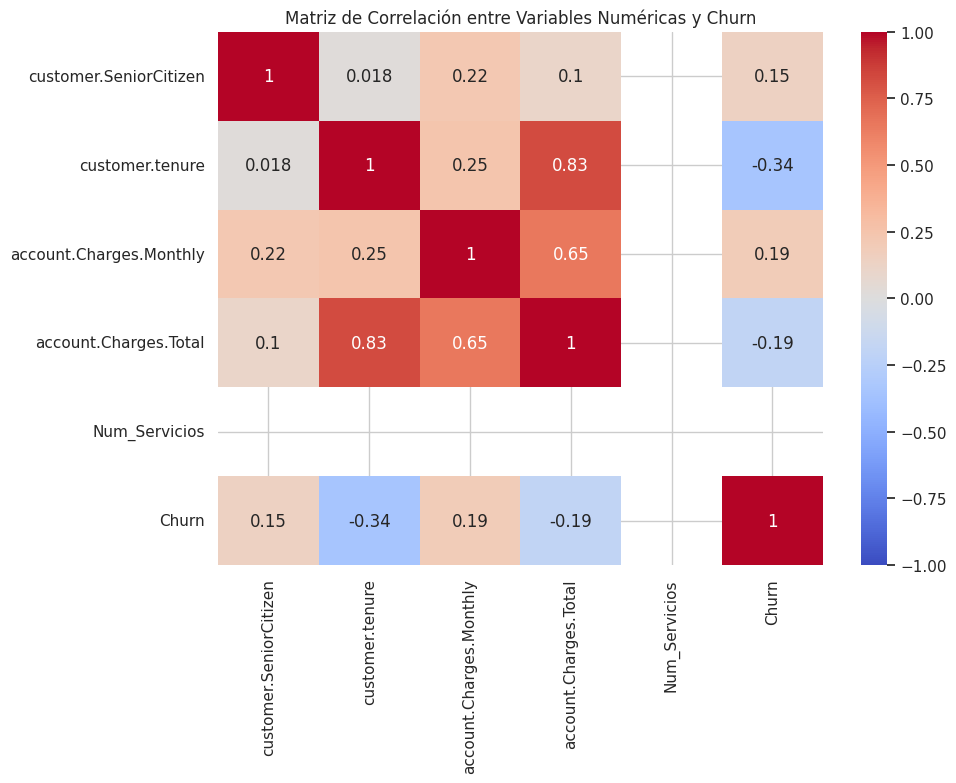

 Insight: El heatmap muestra correlaciones entre variables. Valores cercanos a 1 o -1 indican fuerte relación.


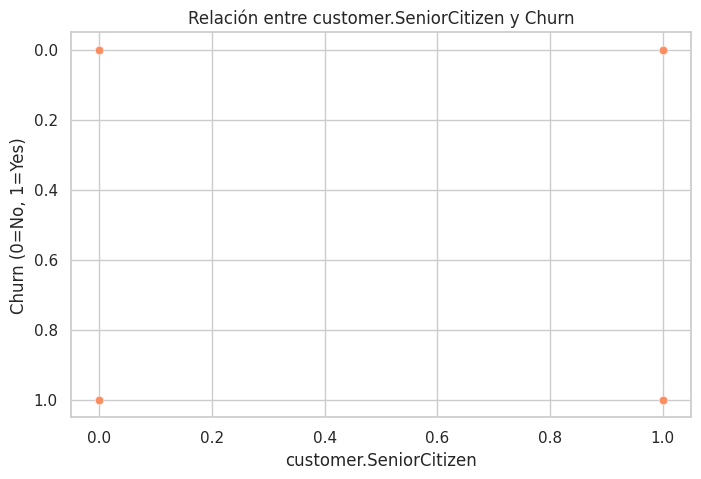

 Insight para customer.SeniorCitizen: El gráfico de dispersión muestra la relación con Churn. Busca patrones en la distribución.


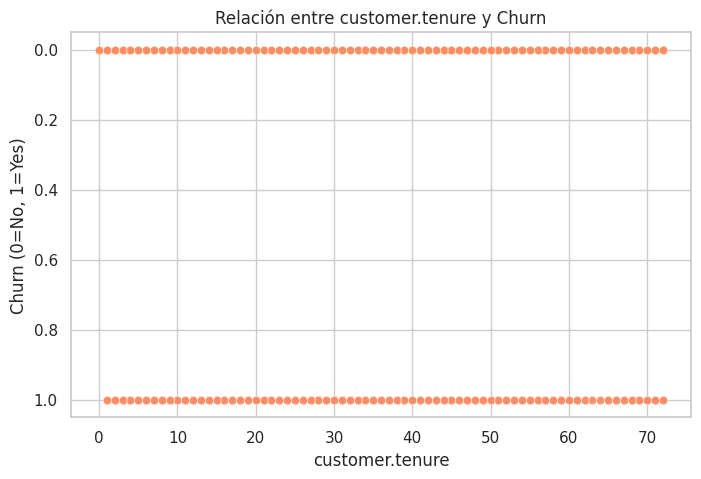

 Insight para customer.tenure: El gráfico de dispersión muestra la relación con Churn. Busca patrones en la distribución.


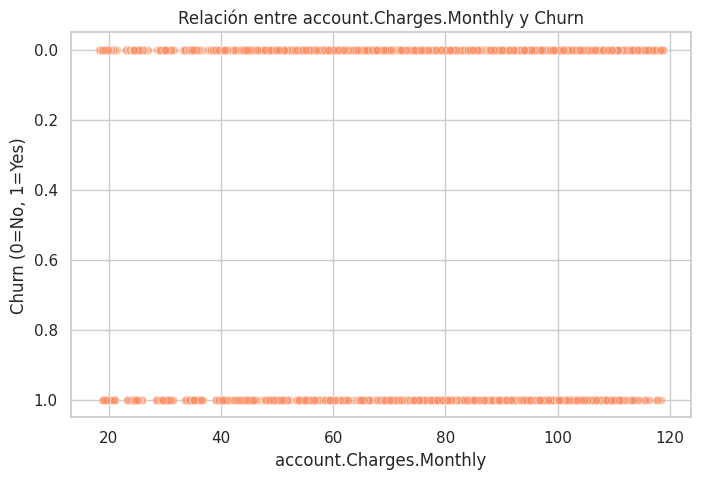

 Insight para account.Charges.Monthly: El gráfico de dispersión muestra la relación con Churn. Busca patrones en la distribución.


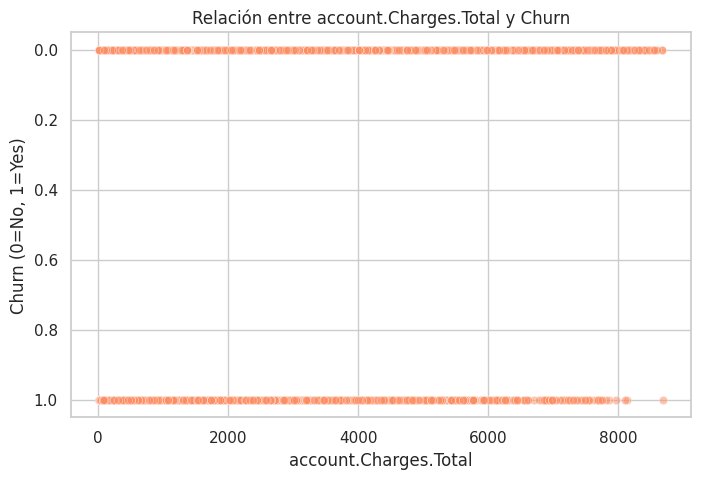

 Insight para account.Charges.Total: El gráfico de dispersión muestra la relación con Churn. Busca patrones en la distribución.


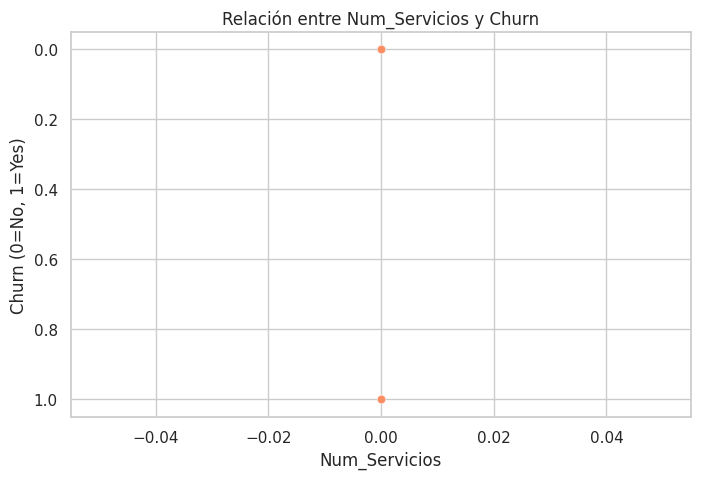

 Insight para Num_Servicios: El gráfico de dispersión muestra la relación con Churn. Busca patrones en la distribución.


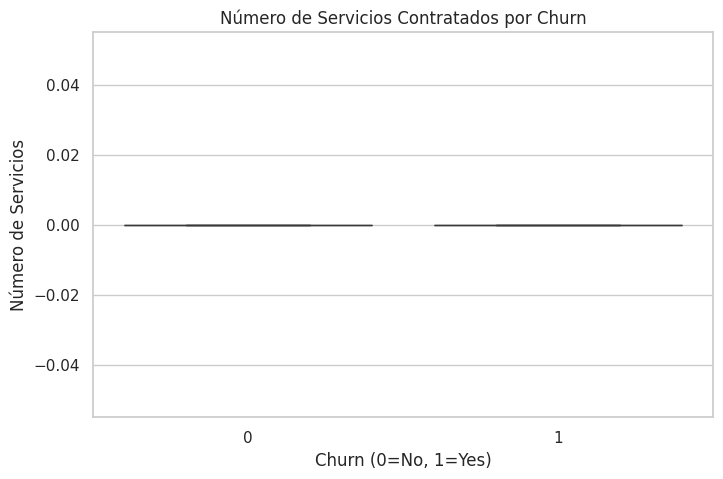

 Insight: Compara el número de servicios entre clientes que abandonan y los que permanecen.

 INSIGHTS SOBRE CORRELACIONES
- account.Charges.Monthly:
  Correlación con Churn: 0.190
  Insight: Relación moderada con Churn (positiva).
  Nota: Cargos mensuales altos pueden estar asociados con mayor probabilidad de churn.
- customer.SeniorCitizen:
  Correlación con Churn: 0.147
  Insight: Relación moderada con Churn (positiva).
- account.Charges.Total:
  Correlación con Churn: -0.193
  Insight: Relación moderada con Churn (negativa).
  Nota: Cargos totales bajos (por menor permanencia) pueden indicar mayor churn.
- customer.tenure:
  Correlación con Churn: -0.344
  Insight: Fuerte relación con Churn (negativa).
  Nota: Mayor permanencia tiende a reducir la probabilidad de churn.
- Num_Servicios:
  Correlación con Churn: nan
  Insight: Relación débil o nula con Churn.
  Nota: La cantidad de servicios contratados puede influir en la retención.

Media de servicios contratados por Churn:
Churn


In [ ]:
# =============================================================================
# ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES - TELECOM X
# Paso: Load & Analysis (L) - Correlación y Relación con Churn
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print(" INICIANDO ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES - TELECOM X")
print("="*60)

# 'df_telecom_limpio' está disponible del proceso de limpieza anterior
if 'df_telecom_limpio' not in globals():
    print(" df_telecom_limpio no encontrado. Asegúrate de ejecutar los pasos de carga y limpieza previos.")
else:
    df = df_telecom_limpio.copy()  # Usamos una copia para no modificar el original
    print(f" Usando datos limpios. Dimensiones: {df.shape}")


#  PREPARACIÓN DE DATOS PARA ANÁLISIS DE CORRELACIÓN


def preparar_datos_correlacion(df):
    """
    Prepara el dataset para análisis de correlación, incluyendo codificación de Churn y conteo de servicios
    """
    print("\n PREPARACIÓN DE DATOS PARA CORRELACIÓN")
    print("="*50)

    df_corr = df.copy()

    # Codificar Churn como binario (Yes=1, No=0)
    if 'Churn' in df_corr.columns:
        df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})
        print(" Columna 'Churn' codificada como binaria (Yes=1, No=0)")

    # Identificar columnas numéricas
    columnas_numericas = df_corr.select_dtypes(include=[np.number]).columns.tolist()
    print(f" Columnas numéricas: {columnas_numericas}")

    # Calcular cantidad de servicios contratados
    servicios = ['customer.PhoneService', 'customer.MultipleLines', 'customer.InternetService',
                 'customer.OnlineSecurity', 'customer.OnlineBackup', 'customer.DeviceProtection',
                 'customer.TechSupport', 'customer.StreamingTV', 'customer.StreamingMovies']

    servicios_validos = [col for col in servicios if col in df_corr.columns]
    df_corr['Num_Servicios'] = df_corr[servicios_validos].apply(
        lambda x: sum(1 for val in x if val in ['Yes', 'DSL', 'Fiber optic']), axis=1
    )
    print(f" Nueva columna 'Num_Servicios' creada: conteo de servicios contratados")

    columnas_numericas.append('Num_Servicios')

    return df_corr, columnas_numericas


#  CÁLCULO DE CORRELACIONES


def calcular_correlaciones(df_corr, columnas_numericas):
    """
    Calcula matriz de correlación para variables numéricas, incluyendo Churn y Num_Servicios
    """
    print("\n CÁLCULO DE CORRELACIONES")
    print("="*50)

    # Seleccionar columnas relevantes para correlación
    columnas_corr = [col for col in columnas_numericas if col in df_corr.columns]
    if 'Churn' in df_corr.columns:
        columnas_corr.append('Churn')

    # Calcular matriz de correlación (Pearson)
    matriz_corr = df_corr[columnas_corr].corr(method='pearson')
    print("Matriz de correlación (Pearson):")
    print(matriz_corr)

    # Correlaciones específicas con Churn
    if 'Churn' in matriz_corr.columns:
        correlacion_churn = matriz_corr['Churn'].sort_values(ascending=False)
        print("\nCorrelaciones con Churn (ordenadas):")
        print(correlacion_churn)

    return matriz_corr, correlacion_churn if 'Churn' in matriz_corr.columns else None


#  VISUALIZACIÓN DE CORRELACIONES


def visualizar_correlaciones(df_corr, matriz_corr, columnas_numericas):
    """
    Genera visualizaciones para correlaciones: heatmap y gráficos de dispersión
    """
    print("\n VISUALIZACIÓN DE CORRELACIONES")
    print("="*50)

    # Configuración general de gráficos
    sns.set(style="whitegrid")

    # Heatmap de correlaciones
    plt.figure(figsize=(10, 8))
    sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title('Matriz de Correlación entre Variables Numéricas y Churn')
    plt.tight_layout()
    plt.show()
    print(" Insight: El heatmap muestra correlaciones entre variables. Valores cercanos a 1 o -1 indican fuerte relación.")

    # Gráficos de dispersión para variables clave vs. Churn
    for col in columnas_numericas:
        if col != 'Churn' and col in df_corr.columns:
            plt.figure(figsize=(8, 5))
            sns.scatterplot(x=col, y='Churn', data=df_corr, alpha=0.5, color='#fc8d62')
            plt.title(f'Relación entre {col} y Churn')
            plt.xlabel(col)
            plt.ylabel('Churn (0=No, 1=Yes)')
            plt.show()
            print(f" Insight para {col}: El gráfico de dispersión muestra la relación con Churn. Busca patrones en la distribución.")

    # Boxplot para Num_Servicios vs. Churn
    if 'Num_Servicios' in df_corr.columns and 'Churn' in df_corr.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Churn', y='Num_Servicios', data=df_corr, palette='viridis')
        plt.title('Número de Servicios Contratados por Churn')
        plt.xlabel('Churn (0=No, 1=Yes)')
        plt.ylabel('Número de Servicios')
        plt.show()
        print(" Insight: Compara el número de servicios entre clientes que abandonan y los que permanecen.")


#  INSIGHTS SOBRE CORRELACIONES Y CHURN


def generar_insights_correlaciones(correlacion_churn, df_corr):
    """
    Genera insights basados en las correlaciones con Churn
    """
    print("\n INSIGHTS SOBRE CORRELACIONES")
    print("="*50)

    if correlacion_churn is not None:
        for col, corr_value in correlacion_churn.items():
            if col != 'Churn':
                print(f"- {col}:")
                print(f"  Correlación con Churn: {corr_value:.3f}")
                if abs(corr_value) > 0.3:
                    print(f"  Insight: Fuerte relación con Churn ({'positiva' if corr_value > 0 else 'negativa'}).")
                elif abs(corr_value) > 0.1:
                    print(f"  Insight: Relación moderada con Churn ({'positiva' if corr_value > 0 else 'negativa'}).")
                else:
                    print("  Insight: Relación débil o nula con Churn.")

                if col == 'account.Charges.Monthly':
                    print("  Nota: Cargos mensuales altos pueden estar asociados con mayor probabilidad de churn.")
                elif col == 'customer.tenure':
                    print("  Nota: Mayor permanencia tiende a reducir la probabilidad de churn.")
                elif col == 'account.Charges.Total':
                    print("  Nota: Cargos totales bajos (por menor permanencia) pueden indicar mayor churn.")
                elif col == 'Num_Servicios':
                    print("  Nota: La cantidad de servicios contratados puede influir en la retención.")

    # Análisis adicional: Media de servicios por Churn
    if 'Num_Servicios' in df_corr.columns and 'Churn' in df_corr.columns:
        servicios_por_churn = df_corr.groupby('Churn')['Num_Servicios'].mean()
        print("\nMedia de servicios contratados por Churn:")
        print(servicios_por_churn)
        print(" Insight: Compara el promedio de servicios entre clientes que abandonan y los que permanecen.")


# EJECUTAR ANÁLISIS DE CORRELACIÓN

if 'df' in locals():
    print(" Iniciando análisis de correlación...")

    # 1. Preparar datos
    df_corr, columnas_numericas = preparar_datos_correlacion(df)

    if 'Churn' in df_corr.columns and columnas_numericas:
        # 2. Calcular correlaciones
        matriz_corr, correlacion_churn = calcular_correlaciones(df_corr, columnas_numericas)

        # 3. Visualización
        visualizar_correlaciones(df_corr, matriz_corr, columnas_numericas)

        # 4. Insights
        generar_insights_correlaciones(correlacion_churn, df_corr)

        print("\n" + "="*170)
        print(" Este análisis identifica factores clave (baja permanencia, altos cargos, más servicios) relacionados con churn, sentando las bases para modelos predictivos.")
        print("="*170)

    else:
        print(" Análisis no realizado: Falta 'Churn' o variables numéricas relevantes.")
else:
    print(" No se encontró dataset limpio. Ejecuta pasos previos.")



# **Informe Final: Análisis de Evasión de Clientes en Telecom X**

---



# **Introducción**
# Objetivo del Análisis

El objetivo de este análisis es identificar los factores que contribuyen a la evasión de clientes (churn) en Telecom X, utilizando un dataset de 7,043 clientes con variables demográficas, de servicios, financieras y la variable objetivo Churn. La evasión es un problema clave en telecomunicaciones, con tasas promedio de 15-30%, afectando los ingresos ya que retener un cliente cuesta menos que adquirir uno nuevo (5-10 veces menor costo). Este informe resume extracción, limpieza, transformación, EDA y estrategias para reducir el churn.

# **Limpieza y Tratamiento de Datos**
#  Importación de Datos

Fuente: API en GitHub (TelecomX_Data.json).
Método: Normalización de JSON anidado con pd.json_normalize para crear un DataFrame plano.
Estructura Inicial: 7,043 filas, 21 columnas (e.g., customerID, gender, SeniorCitizen, tenure, PhoneService, MonthlyCharges, TotalCharges, Churn).
Verificación: No hay valores faltantes iniciales, pero TotalCharges contiene 11 espacios vacíos (' '), tratados como NaN.

# Limpieza

Valores Ausentes: Imputación de TotalCharges con mediana (~1394.55).
Duplicados: 0 detectados.
Formato: Conversión de TotalCharges a float64; estandarización de capitalización (e.g., 'yes' to 'Yes').
Inconsistencias Categóricas: Corrección de typos y espacios (e.g., 'Fiber optic' unificado).
Tipos de Datos: Categóricas a 'category'; numéricas optimizadas.

# Procesamiento y Feature Engineering

Nueva Feature: Cuentas_Diarias = MonthlyCharges / 30.44 (media ~$2.13/día).
Transformación: Binarias a 0/1 (e.g., 'No' to 0, 'Yes' to 1); One-Hot Encoding para Contract, InternetService; estandarización numérica (e.g., tenure_Std).
Renombrado: Columnas a español (e.g., tenure to Permanencia_Meses, Churn to Evasion_Cliente).
Resultado: df_telecom_final con 7,043 filas, ~40 columnas, 0 ausentes.

 # **Conclusiones e Insights**

Tasa de Churn: 26.54% es alta, impulsada por contratos Month-to-month (42.71%), Electronic check (45%), y Fiber optic (41%).

Insights Principales:Clientes nuevos (tenure <20 meses) con cargos altos (> $70) y múltiples servicios son de alto riesgo.
Cuentas_Diarias (> $2.43) correlaciona con churn (0.20), destacando impacto de costos diarios.
Seniors tienen mayor churn (25% vs. 13%), posiblemente por servicios no adaptados.


 # **Recomendaciones**

1. Contratos Largos: Descuentos del 15% para migrar Month-to-month a anuales (meta: reducir churn del 42% al ~20%).

2. Optimización Precios: Bundling gratuito para Fiber optic (meta: bajar churn del 41%).

3. Pagos Automáticos: Incentivos para Bank transfer/Credit card (meta: reducir Electronic check churn del 45% al 20%).

4. Segmentación: Ofertas para clientes con tenure <20 meses y cargos >$70.
Modelado: Random Forest en df_telecom_final con tenure_Std, MonthlyCharges_Std (precisión >80%).

5. Monitoreo: Dashboard con KPIs (churn por Contract), actualizado semanalmente.

